This version uses only left and right spectrums and input as 2 separate channels

In [1]:
import matplotlib
#matplotlib.use("TkAgg")
from scipy.io import wavfile
from scipy import signal
from scipy.signal import blackman
#from matplotlib import mlab
from matplotlib import pyplot as plt
import numpy as np
#from numpy.lib import stride_tricks
from pylab import *
from struct import pack
#import pywt
from scipy.fftpack import dct
#from struct import pack
import wave
from scipy.io import wavfile
import os
#import glob

import gc
import multiprocessing as mp
import resource 
import csv
import itertools

import pandas as pd
import ipywidgets as widgets

gc.enable()

flag = 0
date = '20210310'
dates = ['20210310','20210315','20210319']
data_path = 'data/'
mono_path = data_path + "wav/"
stereo_path = data_path + "stereo/"

mono_file_path = mono_path + date + "/"
stereo_file_path = stereo_path + date + "/"

sweep_path = data_path + "sweep/"
sweep_time_path = sweep_path + date + "/"

aud_path = data_path + "aud_times/"
aud_time_path = aud_path + date + "/"

visual_path = 'visual/'

#print os.path.splitext("20171025/data/")[0]

In [2]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

%config IPCompleter.greedy=True

# Checking memory usage

In [3]:
def mem():
    print('Memory usage  : %2.2f MB' %round(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0,1))

In [4]:
from os import listdir
from os.path import isfile, join
onlyfiles=[]
for d in dates:
    print(d)
    mypath = "processed/" + "spectrum/" + d + "/left"
    of = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles.extend(of)

20210310
20210315
20210319


In [5]:
onlyfiles.sort()

In [6]:
onlyfiles

['20210310_15:25:26.159-20210310_15:25:39.816',
 '20210310_15:25:48.350-20210310_15:25:58.158',
 '20210310_15:26:14.684-20210310_15:26:25.036',
 '20210310_15:26:36.351-20210310_15:26:45.720',
 '20210310_15:26:59.160-20210310_15:27:08.845',
 '20210310_15:27:20.548-20210310_15:27:30.566',
 '20210310_15:29:00.353-20210310_15:29:09.829',
 '20210310_15:29:25.107-20210310_15:29:34.689',
 '20210310_15:29:41.711-20210310_15:29:51.347',
 '20210310_15:30:04.369-20210310_15:30:13.898',
 '20210310_15:30:21.964-20210310_15:30:32.030',
 '20210310_15:30:50.167-20210310_15:31:01.015',
 '20210310_15:31:09.318-20210310_15:31:20.694',
 '20210310_15:31:57.174-20210310_15:32:07.006',
 '20210310_15:32:14.252-20210310_15:32:24.462',
 '20210310_15:32:32.730-20210310_15:32:42.915',
 '20210310_15:32:48.233-20210310_15:32:58.401',
 '20210310_15:33:58.721-20210310_15:34:08.178',
 '20210310_15:34:21.045-20210310_15:34:32.102',
 '20210310_15:34:48.696-20210310_15:34:57.898',
 '20210310_15:42:00.571-20210310_15:42:1

# Label the instances

imp_res = pd.DataFrame()
for f in onlyfiles:
    ir = pd.read_csv("processed/" + "ir_raw/" + date + "/left/" + f, index_col=False, header=None)
    #break
    if date == "20210218":
        if f in {'20210218_16:44:01.177-20210218_16:44:33.943','20210218_16:51:41.403-20210218_16:52:20.100','20210218_16:53:18.712-20210218_16:54:04.193'}:
            index = ['no']*len(ir)
        if f in {'20210218_16:57:18.254-20210218_16:58:03.582','20210218_17:00:26.185-20210218_17:01:01.872','20210218_17:01:08.542-20210218_17:01:43.332'}:
            index = ['up']*len(ir)
        if f in {'20210218_17:03:41.837-20210218_17:04:15.747','20210218_17:05:08.986-20210218_17:05:42.206','20210218_17:04:31.485-20210218_17:05:06.079'}:
            index = ['side']*len(ir)
            
    if date == "20210224":
        if f in {'20210224_17:55:21.433-20210224_17:55:55.191','20210224_17:56:04.294-20210224_17:56:39.426','20210224_17:57:00.457-20210224_17:57:34.537'}:
            index = ['up']*len(ir)
        if f in {'20210224_17:59:54.251-20210224_18:00:26.660','20210224_18:00:38.187-20210224_18:01:11.561','20210224_18:01:26.215-20210224_18:01:58.796'}:
            index = ['side']*len(ir)
        if f in {'20210224_18:06:50.537-20210224_18:07:23.479','20210224_18:08:00.368-20210224_18:08:33.322','20210224_18:08:37.805-20210224_18:09:11.272'}:
            index = ['no']*len(ir)
            
    if date == "20210302":
        if f in {'20210302_18:23:30.772-20210302_18:24:04.601','20210302_18:24:11.484-20210302_18:24:43.738','20210302_18:24:49.526-20210302_18:25:20.850'}:
            index = ['up']*len(ir)
        if f in {'20210302_18:32:33.332-20210302_18:33:05.962','20210302_18:33:12.699-20210302_18:33:44.740','20210302_18:33:51.921-20210302_18:34:24.773'}:
            index = ['side']*len(ir)
        if f in {'20210302_18:36:32.772-20210302_18:37:04.393','20210302_18:37:21.275-20210302_18:37:52.954','20210302_18:37:59.677-20210302_18:38:31.361'}:
            index = ['no']*len(ir)
        
    ir.index = index
    imp_res = pd.concat([imp_res, ir], axis=0)

# Leave-one-session-out CV

In [7]:
session_list = onlyfiles

session_list = ['20210302_18:23:30.772-20210302_18:24:04.601','20210302_18:24:11.484-20210302_18:24:43.738','20210302_18:24:49.526-20210302_18:25:20.850','20210302_18:32:33.332-20210302_18:33:05.962','20210302_18:33:12.699-20210302_18:33:44.740','20210302_18:33:51.921-20210302_18:34:24.773','20210302_18:36:32.772-20210302_18:37:04.393','20210302_18:37:21.275-20210302_18:37:52.954','20210302_18:37:59.677-20210302_18:38:31.361']

session_list = ['20210310_15:25:26.159-20210310_15:25:39.816',
 '20210310_15:25:48.350-20210310_15:25:58.158',
 '20210310_15:26:14.684-20210310_15:26:25.036',
 '20210310_15:26:36.351-20210310_15:26:45.720',
 '20210310_15:26:59.160-20210310_15:27:08.845',
 '20210310_15:27:20.548-20210310_15:27:30.566',
 '20210310_15:29:00.353-20210310_15:29:09.829',
 '20210310_15:29:25.107-20210310_15:29:34.689',
 '20210310_15:29:41.711-20210310_15:29:51.347',
 '20210310_15:30:04.369-20210310_15:30:13.898',
 '20210310_15:30:21.964-20210310_15:30:32.030',
 '20210310_15:30:50.167-20210310_15:31:01.015',
 '20210310_15:31:09.318-20210310_15:31:20.694',
 '20210310_15:31:57.174-20210310_15:32:07.006',
 '20210310_15:32:14.252-20210310_15:32:24.462',
 '20210310_15:32:32.730-20210310_15:32:42.915',
 '20210310_15:32:48.233-20210310_15:32:58.401',
 '20210310_15:33:58.721-20210310_15:34:08.178',
 '20210310_15:34:21.045-20210310_15:34:32.102',
 '20210310_15:34:48.696-20210310_15:34:57.898',
 '20210310_15:42:00.571-20210310_15:42:11.946',
 '20210310_15:42:19.717-20210310_15:42:31.077',
 '20210310_15:42:43.374-20210310_15:42:54.045',
 '20210310_15:43:03.762-20210310_15:43:16.249',
 '20210310_15:44:04.924-20210310_15:44:15.189',
 '20210310_15:45:59.889-20210310_15:46:12.812',
 '20210310_15:46:20.984-20210310_15:46:32.410',
 '20210310_15:47:27.823-20210310_15:47:37.342',
 '20210310_15:49:41.258-20210310_15:49:51.348',
 '20210310_15:50:03.345-20210310_15:50:15.186',
 '20210310_15:50:19.873-20210310_15:50:29.207',
 '20210310_15:51:04.495-20210310_15:51:14.504',
 '20210310_15:51:22.201-20210310_15:51:34.120',
 '20210310_15:51:45.847-20210310_15:51:55.083',
 '20210310_15:52:00.814-20210310_15:52:11.246',
 '20210310_15:52:24.012-20210310_15:52:34.588',
 '20210310_15:52:48.777-20210310_15:52:58.321',
 '20210310_15:54:24.829-20210310_15:54:36.180',
 '20210310_15:58:17.102-20210310_15:58:34.089',
 '20210315_17:05:24.467-20210315_17:05:35.463',
 '20210315_17:05:51.089-20210315_17:06:00.494',
 '20210315_17:06:18.458-20210315_17:06:28.282',
 '20210315_17:07:11.513-20210315_17:07:20.684',
 '20210315_17:07:38.925-20210315_17:07:48.142',
 '20210315_17:08:00.532-20210315_17:08:09.611',
 '20210315_17:08:39.633-20210315_17:08:48.837',
 '20210315_17:09:10.210-20210315_17:09:20.081',
 '20210315_17:09:47.785-20210315_17:09:56.866',
 '20210315_17:10:08.695-20210315_17:10:18.533',
 '20210315_17:10:40.285-20210315_17:10:49.683',
 '20210315_17:11:54.379-20210315_17:12:04.246',
 '20210315_17:12:13.407-20210315_17:12:23.341',
 '20210315_17:13:29.822-20210315_17:13:40.619',
 '20210315_17:17:00.289-20210315_17:17:10.236',
 '20210315_17:19:31.337-20210315_17:19:40.940',
 '20210315_17:20:38.369-20210315_17:20:48.298',
 '20210315_17:21:29.553-20210315_17:21:39.505',
 '20210315_17:21:47.752-20210315_17:21:57.917',
 '20210315_17:23:00.273-20210315_17:23:09.830']

def label_data(f, ir):

    if date == "20210218":
        if f in {'20210218_16:44:01.177-20210218_16:44:33.943','20210218_16:51:41.403-20210218_16:52:20.100','20210218_16:53:18.712-20210218_16:54:04.193'}:
            index = ['no']*len(ir)
        if f in {'20210218_16:57:18.254-20210218_16:58:03.582','20210218_17:00:26.185-20210218_17:01:01.872','20210218_17:01:08.542-20210218_17:01:43.332'}:
            index = ['up']*len(ir)
        if f in {'20210218_17:03:41.837-20210218_17:04:15.747','20210218_17:05:08.986-20210218_17:05:42.206','20210218_17:04:31.485-20210218_17:05:06.079'}:
            index = ['side']*len(ir)
            
    if date == "20210224":
        if f in {'20210224_17:55:21.433-20210224_17:55:55.191','20210224_17:56:04.294-20210224_17:56:39.426','20210224_17:57:00.457-20210224_17:57:34.537'}:
            index = ['up']*len(ir)
        if f in {'20210224_17:59:54.251-20210224_18:00:26.660','20210224_18:00:38.187-20210224_18:01:11.561','20210224_18:01:26.215-20210224_18:01:58.796'}:
            index = ['side']*len(ir)
        if f in {'20210224_18:06:50.537-20210224_18:07:23.479','20210224_18:08:00.368-20210224_18:08:33.322','20210224_18:08:37.805-20210224_18:09:11.272'}:
            index = ['no']*len(ir)
            
    if date == "20210302":
        if f in {'20210302_18:23:30.772-20210302_18:24:04.601','20210302_18:24:11.484-20210302_18:24:43.738','20210302_18:24:49.526-20210302_18:25:20.850'}:
            index = ['up']*len(ir)
        if f in {'20210302_18:32:33.332-20210302_18:33:05.962','20210302_18:33:12.699-20210302_18:33:44.740','20210302_18:33:51.921-20210302_18:34:24.773'}:
            index = ['side']*len(ir)
        if f in {'20210302_18:36:32.772-20210302_18:37:04.393','20210302_18:37:21.275-20210302_18:37:52.954','20210302_18:37:59.677-20210302_18:38:31.361'}:
            index = ['no']*len(ir)
     
    ir.index = index
    return ir

In [8]:
from sklearn.ensemble import RandomForestClassifier
import pickle

def randomForest(train, train_labels):
    # Create the model with 100 trees
    model = RandomForestClassifier(n_estimators=100, criterion="entropy",
                                   max_features = 'sqrt')
    # Fit on training data
    model.fit(train, train_labels)
    #pickle.dump(model, open(root + str(test_env) + "/training_phase/" + "randomForest.sav", 'wb'))
    return model 

In [9]:
def random_undersampling(mots):
    print ("Undersampling..")
    all_mots = pd.DataFrame()
    tr = mots
    labels = mots.index.values.reshape(-1)
    feature_num = np.unique(labels, return_counts=True)
    #print(feature_num)
    min_feature_num = min(feature_num[1])
    #print(min_feature_num)
    feature_num = np.stack(feature_num, axis=1) # label of each cluster and number of instances
    for x in feature_num:
        #print(x)
        #try:
        delete_itr = len(mots.loc[mots.index == x[0]]) - min_feature_num
        #print(delete_itr)
        label_loc = train_data.loc[mots.index == x[0]]
        randoms = label_loc.sample(len(label_loc) - delete_itr)
        #display(randoms)
        all_mots = pd.concat([all_mots,randoms],axis=0)
        #display(all_mots) 
    return all_mots

In [10]:
def extract_mfcc_feat(imp_res):
    sample_rate = 192000
    lbp_set = pd.DataFrame()
    mfcc_set = pd.DataFrame()
    for index, row in imp_res.iterrows():
        signal = np.array(row)
        #formants = get_formants(signal)
        mfcc = calc_mfcc(sample_rate,signal)
        mfcc_set = pd.concat([mfcc_set,pd.DataFrame(mfcc.flatten()).T],axis=0)
        #lbp = lbp_feat_calc(mfcc)
        #lbp_set = pd.concat([lbp_set,lbp], axis=0)
        #formant_set = pd.concat([formant_set, formants,axis=0])
    #lbp_set.index = imp_res.index
    mfcc_set.index = imp_res.index
    return mfcc_set

In [11]:
def extract_spectral_feat(imp_res):
    spectrum_set = pd.DataFrame()
    for index, row in imp_res.iterrows():
        signal = np.array(row)
        f = calculate_spectrum(signal)
        spectrum_set = pd.concat([spectrum_set, f],axis=0)

    spectrum_set.index = imp_res.index
    return spectrum_set

In [12]:
session_list

['20210310_15:25:26.159-20210310_15:25:39.816',
 '20210310_15:25:48.350-20210310_15:25:58.158',
 '20210310_15:26:14.684-20210310_15:26:25.036',
 '20210310_15:26:36.351-20210310_15:26:45.720',
 '20210310_15:26:59.160-20210310_15:27:08.845',
 '20210310_15:27:20.548-20210310_15:27:30.566',
 '20210310_15:29:00.353-20210310_15:29:09.829',
 '20210310_15:29:25.107-20210310_15:29:34.689',
 '20210310_15:29:41.711-20210310_15:29:51.347',
 '20210310_15:30:04.369-20210310_15:30:13.898',
 '20210310_15:30:21.964-20210310_15:30:32.030',
 '20210310_15:30:50.167-20210310_15:31:01.015',
 '20210310_15:31:09.318-20210310_15:31:20.694',
 '20210310_15:31:57.174-20210310_15:32:07.006',
 '20210310_15:32:14.252-20210310_15:32:24.462',
 '20210310_15:32:32.730-20210310_15:32:42.915',
 '20210310_15:32:48.233-20210310_15:32:58.401',
 '20210310_15:33:58.721-20210310_15:34:08.178',
 '20210310_15:34:21.045-20210310_15:34:32.102',
 '20210310_15:34:48.696-20210310_15:34:57.898',
 '20210310_15:42:00.571-20210310_15:42:1

In [13]:
def make_data(data_set):
    X = data_set
    y = data_set.index
    
    return X,y

In [14]:
def label_data(f, ir,date):
    ir = ir
    imp_res = pd.DataFrame()
    #print(date)
    #for f in onlyfiles:
    #ir = pd.read_csv("processed/" + "mfcc/" + date + "/left/" + f, index_col=False, header=None)
    if date == '20210310':
        #print(datetime.datetime.strptime(f.split("-")[0],'%Y%m%d_%H:%M:%S.%f'))
        if datetime.datetime.strptime(f.split("-")[0],'%Y%m%d_%H:%M:%S.%f') >= datetime.datetime.strptime("20210310_15:25:26_159",'%Y%m%d_%H:%M:%S_%f') and datetime.datetime.strptime(f.split("-")[1],'%Y%m%d_%H:%M:%S.%f') <= datetime.datetime.strptime("20210310_15:34:57_898",'%Y%m%d_%H:%M:%S_%f'):
            index = ['tree']*len(ir)
            #print("tree")
        elif datetime.datetime.strptime(f.split("-")[0],'%Y%m%d_%H:%M:%S.%f') >= datetime.datetime.strptime("20210310_15:42:00_571",'%Y%m%d_%H:%M:%S_%f') and datetime.datetime.strptime(f.split("-")[1],'%Y%m%d_%H:%M:%S.%f') <= datetime.datetime.strptime("20210310_15:58:34_089",'%Y%m%d_%H:%M:%S_%f'):
            index = ['car']*len(ir)
            #print("car")
    elif date == '20210315':
        if datetime.datetime.strptime(f.split("-")[0],'%Y%m%d_%H:%M:%S.%f') >= datetime.datetime.strptime("20210315_17:05:24_467",'%Y%m%d_%H:%M:%S_%f') and datetime.datetime.strptime(f.split("-")[1],'%Y%m%d_%H:%M:%S.%f') <= datetime.datetime.strptime("20210315_17:23:09_830",'%Y%m%d_%H:%M:%S_%f'):
            index = ['wall']*len(ir)
    #print(np.unique(index,return_counts = True))
    elif date == '20210319':
        if datetime.datetime.strptime(f.split("-")[0],'%Y%m%d_%H:%M:%S.%f') >= datetime.datetime.strptime("20210319_13:05:24_467",'%Y%m%d_%H:%M:%S_%f') and datetime.datetime.strptime(f.split("-")[1],'%Y%m%d_%H:%M:%S.%f') <= datetime.datetime.strptime("20210319_18:23:09_830",'%Y%m%d_%H:%M:%S_%f'):
            index = ['signpost']*len(ir)
    ir.index = index
        
    return ir

In [15]:
from sklearn.svm import OneClassSVM 
def one_class_svm(training_data):
    #temp = pd.concat([training_data,testing_data])
    training_len = len(training_data)
    #training_data.index = training_labels[1]
    
    #display(training_data.head())
    #display(testing_data.head())
    
    labels = training_data.index#[1].values.reshape(-1)
    feature_num = np.unique(labels, return_counts=True)
    locs = feature_num[0]
    data = pd.DataFrame()
    for l in locs:
        #display(training_data.loc[training_data.index == l].head())
        print ("training svm....", l)
        svm = OneClassSVM(kernel='rbf', gamma=0.000001)
        svm.fit(training_data.loc[training_data.index == l])
        print ("outlier predicting...", l) 
        #display(testing_data.loc[testing_data.index == l])
        #try:
        out_l = svm.predict(training_data.loc[training_data.index == l])
        print (out_l)
        #print (np.unique(out_l, return_counts=True))
        out_l = pd.DataFrame(out_l,columns = ['out_l']) 
        out_l.index = training_data.loc[training_data.index == l].index

        out = pd.concat([out_l,training_data.loc[training_data.index == l]],axis=1)
        data = pd.concat([data,out])
        data = data[data.out_l != 1]
        data.drop(["out_l"],axis=1,inplace=True)
        
    #data.drop(data['out_l']==-1,axis=0,inplace=True)
    return data

In [16]:
from sklearn.decomposition import PCA
def pca_calc(training_data, testing_data):
    #display(all_acc)
    # Concat with keys
    train_labels = training_data.index
    test_labels = test_data.index
    temp = pd.concat([training_data,testing_data])
    training_len = len(training_data)
    testing_len = len(testing_data)
    # Selecting data from multi index 
    
    
    #temp = np.array(temp)

    pca = PCA(n_components=300)
    acc_w = pca.fit_transform(temp)
    #display(acc_w)
    train = pd.DataFrame(acc_w[0:training_len])
    test = pd.DataFrame(acc_w[training_len:])
    #train,test = temp.xs(0),temp.xs(1)    
    train.index = train_labels
    test.index = test_labels
    return train,test

In [58]:
import torch.nn as nn
import torch
import torchvision
import torchvision.transforms as transforms
class DACNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Add more convolution layers and make the input to the FC small
        self.frequency_feature_extractor = nn.Sequential(
           nn.Conv1d(2, 6, 3, stride=1),
           #nn.MaxPool1d(2,2),nn.ReLU(True),
          nn.Conv1d(6, 16, 3, stride=1),
           #nn.MaxPool1d(2,2),nn.ReLU(True),  
          nn.Conv1d(16, 8, 10, stride=1),
          # nn.MaxPool1d(2,2), nn.ReLU(True),
            nn.Conv1d(8, 10, 3, stride=1),
           #nn.MaxPool1d(2,2), nn.ReLU(True)
        )
        
        self.time_feature_extractor = nn.Sequential(
           nn.Conv2d(2, 6, 3, stride=1),
           nn.MaxPool2d(2,2),nn.ReLU(True),
          nn.Conv2d(6, 16, 3, stride=1),
           nn.MaxPool2d(2,2),nn.ReLU(True),  
          #nn.Conv1d(16, 8, 10, stride=1),
          # nn.MaxPool1d(2,2), nn.ReLU(True),
          #  nn.Conv1d(20, 10, 3, stride=2),
          # nn.MaxPool1d(2,2), nn.ReLU(True)
        )
        
        self.num_cnn_features = 374#932#886#176#496#448#352#94#720
        self.class_classifier = nn.Sequential(
#          nn.Linear(self.num_cnn_features, 80),nn.BatchNorm1d(80),nn.ReLU(True), nn.Dropout(0.2),
#             nn.Linear(80, 20),nn.BatchNorm1d(20),nn.LeakyReLU(True),nn.Dropout(0.2),
#             nn.Linear(20, 10),nn.BatchNorm1d(10),nn.LeakyReLU(True),nn.Dropout(0.2),
#           nn.Linear(10, 4), nn.LeakyReLU(True),
            nn.Linear(self.num_cnn_features, 120),nn.BatchNorm1d(120), nn.LeakyReLU(True),nn.Dropout(0.2),
            nn.Linear(120, 40),nn.BatchNorm1d(40), nn.LeakyReLU(True),nn.Dropout(0.2),
            nn.Linear(40, 10),nn.BatchNorm1d(10), nn.LeakyReLU(True),nn.Dropout(0.2),
            nn.Linear(10, 4), nn.LeakyReLU(True)
        )
        
#         self.domain_classifier = nn.Sequential(
#            nn.Linear(self.num_cnn_features, 120),
#            nn.ReLU(True),
#           nn.Linear(120, 2),
#           nn.LogSoftmax(dim=1),
#         )
        
    def forward(self, x):
        features = x.view(4,-1)
        #print(x.size())
        
#         frequency_domain, time_domain = torch.split(x,[188,744],dim=2)
#         frequency_domain = frequency_domain.view(4,2,int(frequency_domain.size()[2]/2))
#         time_domain = time_domain.view(4,2,31,12)
#         frequency_features = self.frequency_feature_extractor(frequency_domain)
#         time_features = self.time_feature_extractor(time_domain)
#         features = torch.cat((frequency_features.view(4,-1),time_features.view(4,-1)),1)
        #features_grl = GradientReversalFn.apply(features, grl_lambda)
        class_pred = self.class_classifier(features) #classify on regular features
        #domain_pred = self.domain_classifier(features_grl) #classify on features after GRL
        return class_pred

In [18]:
model = DACNN()
device = torch.device('cuda:1')
model = model.to(device)

In [19]:
model

DACNN(
  (frequency_feature_extractor): Sequential(
    (0): Conv1d(2, 6, kernel_size=(3,), stride=(1,))
    (1): Conv1d(6, 16, kernel_size=(3,), stride=(1,))
    (2): Conv1d(16, 8, kernel_size=(10,), stride=(1,))
    (3): Conv1d(8, 10, kernel_size=(3,), stride=(1,))
  )
  (time_feature_extractor): Sequential(
    (0): Conv2d(2, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace)
  )
  (class_classifier): Sequential(
    (0): Linear(in_features=186, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=True)
    (3): Dropout(p=0.2)
    (4): Linear(in_features=100, out_features=4, bias=True)
    (5): LeakyReLU(negative_slope=True)
  )
)

In [20]:
def func(epoch):
    if epoch < 80:
        return 1.0
    elif epoch < 110:
        return 0.8#0.5**2
    elif epoch < 130:
        return 0.5#0.5**3
    elif epoch < 140:
        return 0.1#0.5**3   
    elif epoch < 150:
        return 0.05#0.5**3  
    elif epoch < 160:
        return 0.01#0.5**3  
    elif epoch < 170:
        return 0.005#0.5**3  
    elif epoch < 180:
        return 0.001#0.5**3  
    elif epoch < 180:
        return 0.0005#0.5**3 
    else:
        return 0.0001#0.5**4

In [21]:
import torch.optim as optim

lr = 0.0001
n_epochs = 150#150

#Setup optimizer
#class_optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
#disc_optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
class_optimizer = optim.Adam(model.parameters())

#Separate loss functions for classifier and discriminator
#weights = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.0] #20200706
#class_weights = torch.FloatTensor(weights)
loss_fn_class = nn.CrossEntropyLoss()#weight=class_weights.to(device))

#loss_fn_domain = nn.CrossEntropyLoss()
class_scheduler = torch.optim.lr_scheduler.LambdaLR(class_optimizer, lr_lambda = func)#lambda epoch: 0.95 ** epoch)
#disc_scheduler = torch.optim.lr_scheduler.LambdaLR(disc_optimizer, lr_lambda = func)

In [22]:
import torch.utils.data as data_utils


def make_test_dataloader(targets,data):
    torch_labels = torch.tensor(targets)
    torch_data = torch.tensor(data.values)
    dataset = data_utils.TensorDataset(torch_data,torch_labels)
    #trainset = torch.stack([torch_training_data,torch_training_labels])
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,shuffle = False, drop_last=True,num_workers=2)
    return dataloader

In [23]:
def make_train_dataloader(targets,data):
    torch_labels = torch.tensor(targets)
    torch_data = torch.tensor(data.values)
    dataset = data_utils.TensorDataset(torch_data,torch_labels)
    #trainset = torch.stack([torch_training_data,torch_training_labels])
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,shuffle=True, drop_last=True,num_workers=2)
    return dataloader

In [24]:
#train_dataloader, test_dataloader = prep_data(X_train, y_train, X_test, y_test)

In [25]:
def plot_cm(confusion_matrix,classes):
    import seaborn as sns
    plt.figure(figsize=(10,8))
    ax= plt.subplot()
    #sns.heatmap(confusion_matrix/confusion_matrix.sum(0), annot=True, ax = ax, cmap = "Greys", vmin=0, vmax=1)
    y_axis_labels = classes
    x_axis_labels = classes
    sns.heatmap(confusion_matrix, annot=True, fmt = 'g', ax = ax, cmap = "Greys", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    #sns.heatmap(confusion_matrix, annot=True, fmt='g', ax = ax, cmap = "Greys")
    plt.show()

In [56]:
def read_data(dates,session):
    data = pd.DataFrame()
    for date in dates:
        #print(session[:8])
        #print(date)
        if date == session[:8]:
            #print(session)
            feature1 = pd.read_csv("processed/" + "spectra/" + date + "/right/" + session, index_col=False, header=None)
            feature2 = pd.read_csv("processed/" + "spectra/" + date + "/left/" + session, index_col=False, header=None)
            #feature3 =pd.read_csv("processed/" + "mfccs/" + date + "/right/" + session, index_col=False, header=None)
            #feature4 = pd.read_csv("processed/" + "mfccs/" + date + "/left/" + session, index_col=False, header=None)
            feature5 = diff_calc(feature1)
            feature6 = diff_calc(feature2)
            #display(feature6.head())
            data = pd.concat([feature1,feature2,feature5,feature6],axis=1,ignore_index=True)
            
            #data = feature1
            #data.dropna(inplace=True,axis=0)
            data = label_data(session,data,date)
            #print(np.unique(data.index))
        #except:print("")#data = pd.DataFrame()
    #print(len(data.T))    
    return data

In [27]:
def diff_calc(df_slize):
    df_diff = df_slize.diff(axis=1)
    df_diff.dropna(inplace=True,axis=1)
    #norm_diff = df_diff / df_diff.max(axis=1).values
    norm_diff = df_diff.divide(df_diff.max(axis=1).values, axis=0)
    return norm_diff

In [28]:
from collections import Counter
def majority_vote(y_pred):
    #print(y_pred)
#     delete_list = []
#     c = 0
#     for p in prob:
#         if p.max() < 0.5:
#             delete_list.append(c)
#         c = c + 1
#     y_pred = np.delete(y_pred,delete_list)
#     if y_pred.size > 0:
    maj = Counter(y_pred).most_common(1)[0][0]
#     else: return []
    return maj 

In [29]:
def weighted_majority_vote(y_pred,prob):
    delete_list = []
    c = 0
    gini = gini_calc(prob)
    for g in gini:
        if g > 0.5:
            delete_list.append(c)
        c = c + 1
    temp_y_pred = np.delete(y_pred,delete_list)
    if temp_y_pred.size > 0:
        maj = Counter(temp_y_pred).most_common(1)[0][0]
    else: return majority_vote(y_pred)
    return maj 

In [30]:
def gini_calc(prob):
    gini = []
    for p in prob:
        gini.append(1-np.sum(p**2))
    return gini

In [31]:
from sklearn import preprocessing
def test_nn_model(model):
    model.train(False)
    model.eval()
    test_cpred = []
    test_lbl = []
    test_total = 0.0
    correct = 0.0
    running_loss = 0.0
    total = 0.0
    with torch.no_grad():
        confusion_matrix = torch.zeros(nb_classes, nb_classes)
        for data in test_dataloader:
            seg, labels = data
            outputs = model(seg.unsqueeze(1).float().to(device))
            _, predicted = torch.max(outputs, 1)
            loss = loss_fn_class(outputs.to(device), labels.to(device))

            for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()
            test_total += labels.size(0)
            running_loss += loss.item()
            #Remove "other" from the accuracy

            p = predicted.cpu().tolist()
            test_cpred.extend(p)
            l = labels.cpu().tolist()
            test_lbl.extend(l)
            #break
            #predicted[predicted==le.transform(["other"])[0]] = -1
            #running_corrects += torch.sum(predicted == labels.to(device)).item()

        test_lbl = label_encoder.inverse_transform(test_lbl)
        test_cpred = label_encoder.inverse_transform(test_cpred)
        class_report = (classification_report(test_lbl, test_cpred))
        val_acc = correct/test_total
        val_loss = running_loss/test_total
        return test_lbl, test_cpred, val_acc, val_loss, confusion_matrix
        #print(class_report)


In [37]:
import torch.optim as optim

def train_nn_model():
    
    model = DACNN()
    device = torch.device('cuda:1')
    model = model.to(device)

    lr = 0.0001
    n_epochs = 200#150

    #Setup optimizer
    class_optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    #disc_optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
    #class_optimizer = optim.Adam(model.parameters())

    #Separate loss functions for classifier and discriminator
    #weights = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.0] #20200706
    #class_weights = torch.FloatTensor(weights)
    loss_fn_class = nn.CrossEntropyLoss()#weight=class_weights.to(device))

    #loss_fn_domain = nn.CrossEntropyLoss()
    #class_scheduler = torch.optim.lr_scheduler.LambdaLR(class_optimizer, lr_lambda = func)#lambda epoch: 0.95 ** epoch)
    #disc_scheduler = torch.optim.lr_scheduler.LambdaLR(disc_optimizer, lr_lambda = func)
    
    

    #batch_size = batch_size
    #max_batches = min(len(train_dataloader),len(test_dataloader))
    sdl = []
    tdl = []
    cl = []
    running_corrects = 0.0
    total = 0.0
    train_running_corrects = 0.0
    train_running_loss = 0.0
    train_total = 0.0
    loss_per_epoch = 0.0
    val_losses = []
    val_accuracies = []
    train_losses = []
    train_accuracies = []
    learning_rate = []

    correct = 0
    total = 0
    running_loss=0



    for epoch_idx in range(n_epochs):


        confusion_matrix = torch.zeros(nb_classes, nb_classes)

        #class_scheduler.step()
        #learning_rate.append(class_scheduler.get_lr())

        #print (envs[0])
        cpred = []
        lbl = []
        print(f'Epoch {epoch_idx+1:04d} / {n_epochs:04d}', end='\n=====================================\n')
        dl_source_iter = iter(train_dataloader)
        dl_target_iter = iter(test_dataloader)
        model.train()
        for batch_idx in range(len(train_dataloader)):#range(len(train_dataloader)):#range(max_batches):
            X_s, y_s = next(dl_source_iter)
            class_pred = model(X_s.unsqueeze(1).float().to(device))
            _, c_pred = torch.max(class_pred, 1)
            c_pred.to(device)
            #c_pred[c_pred==7] = -1
            train_running_corrects += torch.sum(c_pred == y_s.to(device)).item()
            train_total += y_s.size(0)

            loss_s_label = loss_fn_class(class_pred, y_s.to(device))
            train_running_loss += loss_s_label.item()
            class_optimizer.zero_grad()
            loss_s_label.backward(retain_graph=True)
            class_optimizer.step()

#             if batch_idx%10 == 9:
#                 print(f'[{batch_idx+1}/{batch_size}] '
#                       f'class_loss: {loss_s_label.item():.4f} '
#                  )
            p = c_pred.cpu().tolist()
            cpred.extend(p)
            l = y_s.cpu().tolist()
            lbl.extend(l)

            total += y_s.size(0)
            correct += (c_pred == y_s.to(device)).sum().item()

            running_loss += loss_s_label.item()

            for t, p in zip(y_s.view(-1), c_pred.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

            class_optimizer.zero_grad()
            loss_s_label.backward(retain_graph=True)
            class_optimizer.step()




        lbl = label_encoder.inverse_transform(lbl)
        cpred = label_encoder.inverse_transform(cpred)
        class_report = (classification_report(lbl, cpred))
        #print(class_report)


        #testing the network
        test_lbl, test_cpred,val_acc, val_loss, test_confusion_matrix = test_nn_model(model)
        val_accuracies.append(val_acc)
        val_losses.append(val_loss)

        train_epochs_acc = train_running_corrects / train_total
        train_epochs_loss = train_running_loss / train_total#(len(train_dataloader)*(epoch_idx+1))
        #print("Learning_rate = ",class_scheduler.get_lr())
        print ("Training accuracy =", train_epochs_acc)
        print ("Training loss =", train_epochs_loss)
        print ("Validation accuracy =", val_acc)
        print ("Validation loss =", val_loss)
        #print('Accuracy of the network: %d %%' % (
            #100 * correct / total))

        epoch_loss = running_loss / len(test_dataloader)
        epochs_acc = running_corrects / total
        #val_losses.append(epoch_loss)
        #val_accuracies.append(epochs_acc)
        train_losses.append(train_epochs_loss)
        train_accuracies.append(train_epochs_acc)
        #plot_cm(test_confusion_matrix,label_encoder.classes_)
        

    return model,val_accuracies,val_losses,train_accuracies,train_losses

In [38]:
def label_sessions(session_list):
    sess_labels = []
    for s in session_list:

        if datetime.datetime.strptime(s.split("-")[0],'%Y%m%d_%H:%M:%S.%f') >= datetime.datetime.strptime("20210310_15:25:26_159",'%Y%m%d_%H:%M:%S_%f') and datetime.datetime.strptime(s.split("-")[1],'%Y%m%d_%H:%M:%S.%f') <= datetime.datetime.strptime("20210310_15:34:57_898",'%Y%m%d_%H:%M:%S_%f'):
            sess_labels.append('tree')

        elif datetime.datetime.strptime(s.split("-")[0],'%Y%m%d_%H:%M:%S.%f') >= datetime.datetime.strptime("20210310_15:42:00_571",'%Y%m%d_%H:%M:%S_%f') and datetime.datetime.strptime(s.split("-")[1],'%Y%m%d_%H:%M:%S.%f') <= datetime.datetime.strptime("20210310_15:58:34_089",'%Y%m%d_%H:%M:%S_%f'):
            sess_labels.append('car')
    
        if datetime.datetime.strptime(s.split("-")[0],'%Y%m%d_%H:%M:%S.%f') >= datetime.datetime.strptime("20210315_17:05:24_467",'%Y%m%d_%H:%M:%S_%f') and datetime.datetime.strptime(s.split("-")[1],'%Y%m%d_%H:%M:%S.%f') <= datetime.datetime.strptime("20210315_17:23:09_830",'%Y%m%d_%H:%M:%S_%f'):
            sess_labels.append('wall')

        if datetime.datetime.strptime(s.split("-")[0],'%Y%m%d_%H:%M:%S.%f') >= datetime.datetime.strptime("20210319_13:05:24_467",'%Y%m%d_%H:%M:%S_%f') and datetime.datetime.strptime(s.split("-")[1],'%Y%m%d_%H:%M:%S.%f') <= datetime.datetime.strptime("20210319_18:23:09_830",'%Y%m%d_%H:%M:%S_%f'):
            sess_labels.append('signpost')
        
    return sess_labels

In [39]:
from sklearn.preprocessing import MinMaxScaler
def normalize_data(training_data, testing_data):
    train_len = len(training_data)
    test_len = len(testing_data)
    temp = pd.get_dummies(pd.concat([training_data,testing_data],keys=[0,1]))
    temp.dropna(axis=1,inplace=True)
    #scaler = MinMaxScaler()
    #dt = scaler.fit_transform(temp)
    
    #temp_min = temp.min().min()
    #temp_max = temp.max().max()
    
    #n_temp = (temp - temp_min)/(temp_max - temp_min)
    n_temp=(temp-temp.mean())/temp.std()
    
    training_data = n_temp[:train_len]
    testing_data = n_temp[train_len:]
    training_data.reset_index(level=0, drop=True, inplace=True)
    testing_data.reset_index(level=0, drop=True, inplace=True)
    return pd.DataFrame(training_data), pd.DataFrame(testing_data)

In [40]:
def write_test_list(filename, test_list):
    with open(model_path + filename + '.txt', 'w') as f:
        for item in test_list:
            f.write("%s\n" % item)

In [41]:
def make_folder_structure():
    if not os.path.exists("./models/"+ version):
        os.mkdir("./models/"+ version,0o777)
        
    if not os.path.exists("./visual/"+ version):
        os.mkdir("./visual/"+ version,0o777)

In [42]:
model

DACNN(
  (frequency_feature_extractor): Sequential(
    (0): Conv1d(2, 6, kernel_size=(3,), stride=(1,))
    (1): Conv1d(6, 16, kernel_size=(3,), stride=(1,))
    (2): Conv1d(16, 8, kernel_size=(10,), stride=(1,))
    (3): Conv1d(8, 10, kernel_size=(3,), stride=(1,))
  )
  (time_feature_extractor): Sequential(
    (0): Conv2d(2, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace)
  )
  (class_classifier): Sequential(
    (0): Linear(in_features=186, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=True)
    (3): Dropout(p=0.2)
    (4): Linear(in_features=100, out_features=4, bias=True)
    (5): LeakyReLU(negative_slope=True)
  )
)

In [43]:
np.unique(y_train,return_counts=True)

NameError: name 'y_train' is not defined

In [44]:
np.unique(testy,return_counts=True)

NameError: name 'testy' is not defined

In [45]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
def SMOTE_oversampling(training_data,training_labels):
    #training_labels = all_mots[[1]]
    #all_mots.drop([0],axis=1,inplace=True)
    #all_mots.drop([1],axis=1,inplace=True)
    #training_data = all_mots 
    ros = SMOTE(sampling_strategy={'car':300,'signpost':300,'tree':300,'wall':300},random_state=0)
    X_resampled, y_resampled = ros.fit_resample(training_data, training_labels)
    return X_resampled, y_resampled

In [46]:
testX,testy=SMOTE_oversampling(X_train,y_train)

NameError: name 'X_train' is not defined

In [47]:
testX

NameError: name 'testX' is not defined

In [48]:
X_train

NameError: name 'X_train' is not defined

In [49]:
from sklearn.decomposition import PCA
def pca_calc(data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(data)
    data = pd.DataFrame(data)
    data.index = labels
    data.columns = ['x','y']
    return data

In [50]:
x1 = pca_calc(X_train, y_train)

NameError: name 'X_train' is not defined

In [51]:
import seaborn as sns

In [52]:
sns.scatterplot(x='x', y='y', hue=x1.index, data=x1) 
plt.grid()

NameError: name 'x1' is not defined

In [53]:
x2 = pca_calc(testX, testy)

NameError: name 'testX' is not defined

In [54]:
sns.scatterplot(x='x', y='y', hue=x2.index, data=x2) 
plt.grid()

NameError: name 'x2' is not defined

In [59]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
import os.path

version = 'v12'
model_path = './models/' + version + '/'
visual_path = './visual/' + version + '/'

make_folder_structure()

temp_session_list = session_list
nb_classes = 4
batch_size = 4
while len(temp_session_list)>0:
    #print(len(session_list))
    sess_labels = label_sessions(temp_session_list)

    df_session_list = pd.DataFrame(temp_session_list)
    df_session_list.index = sess_labels

    test_list = []
    for sl in set(sess_labels):
        try:
            test_list.extend(df_session_list.loc[df_session_list.index == sl].sort_values(by=[0]).iloc[0].values.tolist())
        except: continue
    test_list.sort()
    filename = test_list[0].split("-")[0] + "-" + test_list[-1].split("-")[0]
    PATH = model_path+ filename +'.pth'
    write_test_list(filename,test_list)
    print("Making model for session group " + test_list[0].split("-")[0] + "-" + test_list[-1].split("-")[0])
    if os.path.exists(PATH): print("    Model already exists.")
        
    train_list = list(set(session_list) - set(test_list))#[x for x in session_list if x != test_list]
    #print(len(train_list))
    temp_session_list = list(set(temp_session_list) - set(test_list))#[x for x in temp_session_list if x != test_list]
    if not os.path.exists(PATH): #Do this only if the model is not properly saved
        test_data = pd.DataFrame()
        train_data = pd.DataFrame()

        #test_list.extend(df_session_list.loc[df_session_list.index == sl].sample(1).values.tolist()[0])
        count = 0
        for ts in test_list:
            #print("|" + "*"*(count+1) + ' '*(len(train_list)-1-count)+ "| " +str(format((count+1)/len(train_list)*100,'.3f')) + "% is complete..." ,end="\r")
            try:
                tr = read_data(dates, ts)
                test_data = pd.concat([test_data,tr],axis=0,ignore_index=False)
                count = count+1

                test_data.dropna(inplace=True, axis=0)
            except: continue
            #test_data = one_class_svm(test_data)
            #test_data = pd.concat(diff_calc(test_data.iloc[:,0:94]))

        #break
        train_data = pd.DataFrame()
        #count = 0
        for ts in train_list:
            #print("|" + "*"*(count+1) + ' '*(len(train_list)-1-count)+ "| " +str(format((count+1)/len(train_list)*100,'.3f')) + "% is complete..." ,end="\r")
            #tr = pd.read_csv("processed/" + "spectrum/" + date + "/right/" + ts, index_col=False, header=None)
        #         tr_feature1 = pd.read_csv("processed/" + "spectrum/" + date + "/right/" + ts, index_col=False, header=None)
        #         tr_feature2 = pd.read_csv("processed/" + "spectrum/" + date + "/left/" + ts, index_col=False, header=None)
        #         tr_feature3 =pd.read_csv("processed/" + "mfcc/" + date + "/right/" + ts, index_col=False, header=None)
        #         tr_feature4 = pd.read_csv("processed/" + "mfcc/" + date + "/left/" + ts, index_col=False, header=None)
        #         tr = pd.concat([tr_feature1,tr_feature2,tr_feature3,tr_feature4],axis=1)
        #         tr = label_data(ts,tr)
            try: #This is necessary as the session_list may differ from actual feature files stored
                tr = read_data(dates, ts)
                train_data = pd.concat([train_data,tr],axis=0,ignore_index=False)
            except: continue
        count = count+1
        
        #break
        #print(np.unique(train_data.index, return_counts=True))
        #train_data = random_undersampling(train_data)
        #print(np.unique(train_data.index, return_counts=True))
        train_data.dropna(inplace=True, axis=0)
        test_feat = test_data#extract_mfcc_feat(test_data)
        train_feat = train_data#extract_mfcc_feat(train_data)
        test_feat.dropna(axis=0,inplace=True)
        train_feat.dropna(axis=0,inplace=True)
        X_train, y_train = make_data(train_feat)
        X_test, y_test = make_data(test_feat)
        
        #Smote oversampling
        X_train,y_train = SMOTE_oversampling(X_train,y_train)

        #def prep_data(X_train, y_train, X_test, y_test):
        label_encoder = preprocessing.LabelEncoder()
        training_targets = label_encoder.fit_transform(y_train)

        #Read testing data
        #testing_timestamps,testing_labels,testing_data = read_test_data(test_list)

        #Encode
        testing_targets = label_encoder.transform(y_test)

        #Make training dataloader
        train_dataloader = make_train_dataloader(training_targets, X_train)

        #Make test dataloader
        test_dataloader = make_test_dataloader(testing_targets, X_test)

        #return train_dataloader, test_dataloader

        
        model,val_accuracies,val_losses,train_accuracies,train_losses = train_nn_model()
        #break

        torch.save(model.state_dict(), PATH)

        plt.ylabel("accuracy")
        plt.xlabel("epoch")
        plt.plot(train_accuracies, label="train")
        plt.plot(val_accuracies, label="test")
        plt.legend()
        plt.savefig(visual_path+ "accuracy_"+ filename + ".png")
        plt.close()

        plt.ylabel("loss")
        plt.xlabel("epoch")
        plt.plot(train_losses, label="train")
        plt.plot(val_losses, label="test")
        plt.legend()
        plt.savefig(visual_path+ "loss_"+ filename + ".png")
        plt.close()

Making model for session group 20210310_15:25:26.159-20210319_16:08:41.692


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.44083333333333335
Training loss = 0.3110927981634935
Validation accuracy = 0.5625
Validation loss = 0.285992082208395
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.47708333333333336
Training loss = 0.3002217136820157
Validation accuracy = 0.3125
Validation loss = 0.2670943271368742
Epoch 0003 / 0200
Training accuracy = 0.49944444444444447
Training loss = 0.2931669922007455
Validation accuracy = 0.25
Validation loss = 0.28770624473690987
Epoch 0004 / 0200
Training accuracy = 0.50875
Training loss = 0.28826194427907464
Validation accuracy = 0.46875
Validation loss = 0.2509304154664278
Epoch 0005 / 0200
Training accuracy = 0.5195
Training loss = 0.28470538343985874
Validation accuracy = 0.5
Validation loss = 0.24898050725460052
Epoch 0006 / 0200
Training accuracy = 0.5238888888888888
Training loss = 0.28207855619490146
Validation accuracy = 0.5
Validation loss = 0.24754763208329678
Epoch 0007 / 0200
Training accuracy = 0.5302380952380953
Training loss = 0.2795748238265514
Validation accuracy = 0.46875
Validation loss = 0.2513487311080098
Epoch 0008 / 0200
Training accuracy = 0.5327083333333333
Training loss = 0.2777343236034115

Training accuracy = 0.5767424242424243
Training loss = 0.2522999924895438
Validation accuracy = 0.34375
Validation loss = 0.2724380511790514
Epoch 0045 / 0200
Training accuracy = 0.5777407407407408
Training loss = 0.25196533167141455
Validation accuracy = 0.40625
Validation loss = 0.236351209692657
Epoch 0046 / 0200
Training accuracy = 0.5786231884057971
Training loss = 0.2514701428043022
Validation accuracy = 0.53125
Validation loss = 0.223475425504148
Epoch 0047 / 0200
Training accuracy = 0.5794680851063829
Training loss = 0.25112223925425653
Validation accuracy = 0.625
Validation loss = 0.19805047940462828
Epoch 0048 / 0200
Training accuracy = 0.5798090277777778
Training loss = 0.25087096059513797
Validation accuracy = 0.375
Validation loss = 0.2782694920897484
Epoch 0049 / 0200
Training accuracy = 0.5806122448979592
Training loss = 0.2504994832508925
Validation accuracy = 0.75
Validation loss = 0.19943922758102417
Epoch 0050 / 0200
Training accuracy = 0.5810333333333333
Training lo

Training accuracy = 0.5992732558139535
Training loss = 0.24136149410519372
Validation accuracy = 0.5625
Validation loss = 0.22727246023714542
Epoch 0087 / 0200
Training accuracy = 0.5995593869731801
Training loss = 0.24122955766574292
Validation accuracy = 0.5
Validation loss = 0.23972904030233622
Epoch 0088 / 0200
Training accuracy = 0.5997064393939394
Training loss = 0.24114233904955626
Validation accuracy = 0.5625
Validation loss = 0.21508869901299477
Epoch 0089 / 0200
Training accuracy = 0.600065543071161
Training loss = 0.2409549382207601
Validation accuracy = 0.46875
Validation loss = 0.2505508130416274
Epoch 0090 / 0200
Training accuracy = 0.6005370370370371
Training loss = 0.2406718327374094
Validation accuracy = 0.65625
Validation loss = 0.22456244751811028
Epoch 0091 / 0200
Training accuracy = 0.6011721611721612
Training loss = 0.24044201149649563
Validation accuracy = 0.59375
Validation loss = 0.24118211027234793
Epoch 0092 / 0200
Training accuracy = 0.6014855072463768
Train

Training accuracy = 0.6156510416666666
Training loss = 0.2339478577870371
Validation accuracy = 0.625
Validation loss = 0.1952831055969
Epoch 0129 / 0200
Training accuracy = 0.6158720930232559
Training loss = 0.23384041794096855
Validation accuracy = 0.6875
Validation loss = 0.22281683795154095
Epoch 0130 / 0200
Training accuracy = 0.6161089743589744
Training loss = 0.23370158266801483
Validation accuracy = 0.5625
Validation loss = 0.22985083144158125
Epoch 0131 / 0200
Training accuracy = 0.6161323155216285
Training loss = 0.23365967771848878
Validation accuracy = 0.59375
Validation loss = 0.22188207134604454
Epoch 0132 / 0200
Training accuracy = 0.6165277777777778
Training loss = 0.23346149148824014
Validation accuracy = 0.65625
Validation loss = 0.20106760039925575
Epoch 0133 / 0200
Training accuracy = 0.6168421052631579
Training loss = 0.2333345300029207
Validation accuracy = 0.5
Validation loss = 0.21645058877766132
Epoch 0134 / 0200
Training accuracy = 0.6169776119402985
Training 

Training accuracy = 0.6270735294117648
Training loss = 0.22843027786581832
Validation accuracy = 0.65625
Validation loss = 0.20564347319304943
Epoch 0171 / 0200
Training accuracy = 0.627285575048733
Training loss = 0.22830499932453124
Validation accuracy = 0.59375
Validation loss = 0.23350395821034908
Epoch 0172 / 0200
Training accuracy = 0.6275048449612403
Training loss = 0.22820675869934376
Validation accuracy = 0.6875
Validation loss = 0.1728282468393445
Epoch 0173 / 0200
Training accuracy = 0.6277360308285164
Training loss = 0.22806720956506815
Validation accuracy = 0.75
Validation loss = 0.17227624356746674
Epoch 0174 / 0200
Training accuracy = 0.6279501915708813
Training loss = 0.22793594158879013
Validation accuracy = 0.59375
Validation loss = 0.21877488680183887
Epoch 0175 / 0200
Training accuracy = 0.6282
Training loss = 0.2278190958293421
Validation accuracy = 0.5625
Validation loss = 0.2102945325896144
Epoch 0176 / 0200
Training accuracy = 0.6284090909090909
Training loss = 

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.41333333333333333
Training loss = 0.31853447074691454
Validation accuracy = 0.625
Validation loss = 0.28750913590192795
Epoch 0002 / 0200
Training accuracy = 0.46375
Training loss = 0.30500007507701715
Validation accuracy = 0.65625
Validation loss = 0.2807022091001272
Epoch 0003 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.49666666666666665
Training loss = 0.29476396332184474
Validation accuracy = 0.625
Validation loss = 0.2694101631641388
Epoch 0004 / 0200
Training accuracy = 0.5089583333333333
Training loss = 0.28969763599336146
Validation accuracy = 0.5625
Validation loss = 0.2817184869199991
Epoch 0005 / 0200
Training accuracy = 0.5153333333333333
Training loss = 0.28646713818113007
Validation accuracy = 0.4375
Validation loss = 0.2648978866636753
Epoch 0006 / 0200
Training accuracy = 0.5195833333333333
Training loss = 0.2838916549169355
Validation accuracy = 0.65625
Validation loss = 0.2789005693048239
Epoch 0007 / 0200
Training accuracy = 0.5286904761904762
Training loss = 0.28030823559278534
Validation accuracy = 0.59375
Validation loss = 0.27083830535411835
Epoch 0008 / 0200
Training accuracy = 0.5352083333333333
Training loss = 0.2778170332685113
Validation accuracy = 0.65625
Validation loss = 0.25646064430475235
Epoch 0009 / 0200
Training accuracy = 0.5410185185185186
Trai

Training accuracy = 0.5832407407407407
Training loss = 0.2511202940841516
Validation accuracy = 0.46875
Validation loss = 0.2325176727026701
Epoch 0046 / 0200
Training accuracy = 0.5834057971014492
Training loss = 0.25082135391408117
Validation accuracy = 0.59375
Validation loss = 0.24812223203480244
Epoch 0047 / 0200
Training accuracy = 0.5840780141843972
Training loss = 0.25044386078491276
Validation accuracy = 0.5
Validation loss = 0.22742526698857546
Epoch 0048 / 0200
Training accuracy = 0.5846527777777778
Training loss = 0.2500542509612731
Validation accuracy = 0.46875
Validation loss = 0.2426696978509426
Epoch 0049 / 0200
Training accuracy = 0.5854421768707483
Training loss = 0.24956744180751494
Validation accuracy = 0.625
Validation loss = 0.24159338511526585
Epoch 0050 / 0200
Training accuracy = 0.58585
Training loss = 0.24932194921473663
Validation accuracy = 0.59375
Validation loss = 0.22217135690152645
Epoch 0051 / 0200
Training accuracy = 0.5867483660130719
Training loss = 

Training accuracy = 0.6048563218390804
Training loss = 0.24016980624861187
Validation accuracy = 0.3125
Validation loss = 0.2782458607107401
Epoch 0088 / 0200
Training accuracy = 0.6052840909090909
Training loss = 0.23995011749028256
Validation accuracy = 0.53125
Validation loss = 0.23750678449869156
Epoch 0089 / 0200
Training accuracy = 0.6055337078651686
Training loss = 0.2397483194186893
Validation accuracy = 0.5
Validation loss = 0.2437044382095337
Epoch 0090 / 0200
Training accuracy = 0.605925925925926
Training loss = 0.23953348028439062
Validation accuracy = 0.625
Validation loss = 0.22735321335494518
Epoch 0091 / 0200
Training accuracy = 0.6062179487179488
Training loss = 0.23930010323559409
Validation accuracy = 0.59375
Validation loss = 0.23150553554296494
Epoch 0092 / 0200
Training accuracy = 0.6064492753623189
Training loss = 0.23913371661381014
Validation accuracy = 0.53125
Validation loss = 0.2269686460494995
Epoch 0093 / 0200
Training accuracy = 0.6067473118279569
Trainin

Training accuracy = 0.6186950904392765
Training loss = 0.23350320068363686
Validation accuracy = 0.5
Validation loss = 0.24200116656720638
Epoch 0130 / 0200
Training accuracy = 0.6189679487179487
Training loss = 0.23337212220808634
Validation accuracy = 0.6875
Validation loss = 0.2250908650457859
Epoch 0131 / 0200
Training accuracy = 0.6193956743002544
Training loss = 0.23314497543787988
Validation accuracy = 0.65625
Validation loss = 0.22871782071888447
Epoch 0132 / 0200
Training accuracy = 0.619665404040404
Training loss = 0.23298512348171435
Validation accuracy = 0.59375
Validation loss = 0.23220625333487988
Epoch 0133 / 0200
Training accuracy = 0.620093984962406
Training loss = 0.23281972695001982
Validation accuracy = 0.4375
Validation loss = 0.2627169396728277
Epoch 0134 / 0200
Training accuracy = 0.6203109452736318
Training loss = 0.23271029181704295
Validation accuracy = 0.375
Validation loss = 0.2657991945743561
Epoch 0135 / 0200
Training accuracy = 0.6206481481481482
Training

Training accuracy = 0.6299025341130604
Training loss = 0.22808964996644046
Validation accuracy = 0.5625
Validation loss = 0.21716080233454704
Epoch 0172 / 0200
Training accuracy = 0.6302761627906976
Training loss = 0.22797116615917792
Validation accuracy = 0.65625
Validation loss = 0.23841443844139576
Epoch 0173 / 0200
Training accuracy = 0.6303998073217726
Training loss = 0.22785019996868508
Validation accuracy = 0.625
Validation loss = 0.22541492246091366
Epoch 0174 / 0200
Training accuracy = 0.6307040229885057
Training loss = 0.22773924979584656
Validation accuracy = 0.40625
Validation loss = 0.2622363343834877
Epoch 0175 / 0200
Training accuracy = 0.6308523809523809
Training loss = 0.2276329574594895
Validation accuracy = 0.625
Validation loss = 0.26309653650969267
Epoch 0176 / 0200
Training accuracy = 0.6308522727272727
Training loss = 0.22762045914180237
Validation accuracy = 0.53125
Validation loss = 0.22170555405318737
Epoch 0177 / 0200
Training accuracy = 0.6310969868173258
Tr

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.41083333333333333
Training loss = 0.3115326898296674
Validation accuracy = 0.5
Validation loss = 0.3133013900369406
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.4575
Training loss = 0.29902391783893106
Validation accuracy = 0.46875
Validation loss = 0.3003778923302889
Epoch 0003 / 0200
Training accuracy = 0.4736111111111111
Training loss = 0.2921102728446325
Validation accuracy = 0.5
Validation loss = 0.2948833592236042
Epoch 0004 / 0200
Training accuracy = 0.488125
Training loss = 0.28715266078710555
Validation accuracy = 0.5
Validation loss = 0.286527493968606
Epoch 0005 / 0200
Training accuracy = 0.497
Training loss = 0.2837890414496263
Validation accuracy = 0.5
Validation loss = 0.2869065199047327
Epoch 0006 / 0200
Training accuracy = 0.5073611111111112
Training loss = 0.2805718239148458
Validation accuracy = 0.5
Validation loss = 0.27861650474369526
Epoch 0007 / 0200
Training accuracy = 0.5145238095238095
Training loss = 0.27826178423705555
Validation accuracy = 0.5
Validation loss = 0.2781662065535784
Epoch 0008 / 0200
Training accuracy = 0.5229166666666667
Training loss = 0.2754376269939045
Validation accuracy = 0.

Training accuracy = 0.5828333333333333
Training loss = 0.246969225195271
Validation accuracy = 0.53125
Validation loss = 0.25862702168524265
Epoch 0046 / 0200
Training accuracy = 0.5834963768115942
Training loss = 0.24672239275136287
Validation accuracy = 0.5625
Validation loss = 0.23714107181876898
Epoch 0047 / 0200
Training accuracy = 0.5844680851063829
Training loss = 0.24639088282876825
Validation accuracy = 0.5625
Validation loss = 0.2487379675731063
Epoch 0048 / 0200
Training accuracy = 0.5856423611111111
Training loss = 0.24600958202551637
Validation accuracy = 0.59375
Validation loss = 0.2384548792615533
Epoch 0049 / 0200
Training accuracy = 0.5857993197278911
Training loss = 0.24581332357866423
Validation accuracy = 0.5625
Validation loss = 0.24240044504404068
Epoch 0050 / 0200
Training accuracy = 0.5863333333333334
Training loss = 0.24551522365560136
Validation accuracy = 0.5625
Validation loss = 0.24268191866576672
Epoch 0051 / 0200
Training accuracy = 0.586781045751634
Trai

Training accuracy = 0.6036973180076628
Training loss = 0.2375331308144605
Validation accuracy = 0.5625
Validation loss = 0.2265597591176629
Epoch 0088 / 0200
Training accuracy = 0.6042992424242424
Training loss = 0.23726935410646327
Validation accuracy = 0.5
Validation loss = 0.24264999199658632
Epoch 0089 / 0200
Training accuracy = 0.604559925093633
Training loss = 0.23705571776332704
Validation accuracy = 0.5625
Validation loss = 0.2459082007408142
Epoch 0090 / 0200
Training accuracy = 0.605
Training loss = 0.23686626384766013
Validation accuracy = 0.5
Validation loss = 0.4280321318656206
Epoch 0091 / 0200
Training accuracy = 0.6052747252747253
Training loss = 0.23669309966457197
Validation accuracy = 0.5625
Validation loss = 0.21868717204779387
Epoch 0092 / 0200
Training accuracy = 0.6054619565217392
Training loss = 0.2365650943191587
Validation accuracy = 0.625
Validation loss = 0.22947491705417633
Epoch 0093 / 0200
Training accuracy = 0.6059229390681004
Training loss = 0.236323140

Training accuracy = 0.6165697674418604
Training loss = 0.23143784113209068
Validation accuracy = 0.65625
Validation loss = 0.21593606751412153
Epoch 0130 / 0200
Training accuracy = 0.6168717948717949
Training loss = 0.23132634548403513
Validation accuracy = 0.5625
Validation loss = 0.22493908368051052
Epoch 0131 / 0200
Training accuracy = 0.617118320610687
Training loss = 0.23125191860355948
Validation accuracy = 0.53125
Validation loss = 0.2323811436071992
Epoch 0132 / 0200
Training accuracy = 0.6173926767676767
Training loss = 0.23114158367644055
Validation accuracy = 0.59375
Validation loss = 0.22355528734624386
Epoch 0133 / 0200
Training accuracy = 0.6175689223057644
Training loss = 0.23103742293341267
Validation accuracy = 0.5625
Validation loss = 0.23332750611007214
Epoch 0134 / 0200
Training accuracy = 0.617773631840796
Training loss = 0.23098388666426067
Validation accuracy = 0.65625
Validation loss = 0.2043364467099309
Epoch 0135 / 0200
Training accuracy = 0.6179382716049383
T

Training accuracy = 0.627504873294347
Training loss = 0.2264531231992542
Validation accuracy = 0.5625
Validation loss = 0.22918958961963654
Epoch 0172 / 0200
Training accuracy = 0.6277083333333333
Training loss = 0.2263414272933101
Validation accuracy = 0.5625
Validation loss = 0.2263497794046998
Epoch 0173 / 0200
Training accuracy = 0.6279865125240848
Training loss = 0.2261893348928419
Validation accuracy = 0.59375
Validation loss = 0.19795197248458862
Epoch 0174 / 0200
Training accuracy = 0.6281130268199234
Training loss = 0.22609696987359804
Validation accuracy = 0.5
Validation loss = 0.24852805212140083
Epoch 0175 / 0200
Training accuracy = 0.6283571428571428
Training loss = 0.22601018612299648
Validation accuracy = 0.65625
Validation loss = 0.2100735967978835
Epoch 0176 / 0200
Training accuracy = 0.6285511363636364
Training loss = 0.22587719593373495
Validation accuracy = 0.59375
Validation loss = 0.2372080385684967
Epoch 0177 / 0200
Training accuracy = 0.6288418079096045
Training

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.4091666666666667
Training loss = 0.3072168976565202
Validation accuracy = 0.625
Validation loss = 0.2762775178998709
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.44916666666666666
Training loss = 0.29581730420390767
Validation accuracy = 0.5
Validation loss = 0.28640185110270977
Epoch 0003 / 0200
Training accuracy = 0.47305555555555556
Training loss = 0.28821501308017305
Validation accuracy = 0.46875
Validation loss = 0.26888144575059414
Epoch 0004 / 0200
Training accuracy = 0.493125
Training loss = 0.2832156123345097
Validation accuracy = 0.5
Validation loss = 0.2677844539284706
Epoch 0005 / 0200
Training accuracy = 0.5063333333333333
Training loss = 0.2798522323866685
Validation accuracy = 0.53125
Validation loss = 0.27739677857607603
Epoch 0006 / 0200
Training accuracy = 0.5147222222222222
Training loss = 0.27734591020892063
Validation accuracy = 0.34375
Validation loss = 0.27933224104344845
Epoch 0007 / 0200
Training accuracy = 0.5264285714285715
Training loss = 0.2737052963212842
Validation accuracy = 0.4375
Validation loss = 0.28210203908383846
Epoch 0008 / 0200
Training accuracy = 0.5365625
Training loss = 0.2699782

Training accuracy = 0.592935606060606
Training loss = 0.24544561794197017
Validation accuracy = 0.5
Validation loss = 0.2678898870944977
Epoch 0045 / 0200
Training accuracy = 0.5933703703703703
Training loss = 0.24535461250113116
Validation accuracy = 0.375
Validation loss = 0.26906339079141617
Epoch 0046 / 0200
Training accuracy = 0.5941666666666666
Training loss = 0.24501522517560617
Validation accuracy = 0.4375
Validation loss = 0.2607721909880638
Epoch 0047 / 0200
Training accuracy = 0.5947517730496454
Training loss = 0.24483604991901006
Validation accuracy = 0.40625
Validation loss = 0.26850578747689724
Epoch 0048 / 0200
Training accuracy = 0.5961631944444444
Training loss = 0.24431080690015936
Validation accuracy = 0.53125
Validation loss = 0.26383247412741184
Epoch 0049 / 0200
Training accuracy = 0.5962244897959184
Training loss = 0.2442046853712424
Validation accuracy = 0.59375
Validation loss = 0.24102051183581352
Epoch 0050 / 0200
Training accuracy = 0.5969666666666666
Traini

Training accuracy = 0.6150096899224806
Training loss = 0.2353357554498569
Validation accuracy = 0.4375
Validation loss = 0.2573054116219282
Epoch 0087 / 0200
Training accuracy = 0.6153639846743295
Training loss = 0.23516460073234022
Validation accuracy = 0.5
Validation loss = 0.2597010210156441
Epoch 0088 / 0200
Training accuracy = 0.6159753787878788
Training loss = 0.23491790776225654
Validation accuracy = 0.5625
Validation loss = 0.24419079814106226
Epoch 0089 / 0200
Training accuracy = 0.6163951310861423
Training loss = 0.23472818204944723
Validation accuracy = 0.46875
Validation loss = 0.2657782956957817
Epoch 0090 / 0200
Training accuracy = 0.6167777777777778
Training loss = 0.23458200131522283
Validation accuracy = 0.375
Validation loss = 0.2732702549546957
Epoch 0091 / 0200
Training accuracy = 0.6171336996336997
Training loss = 0.2344721783643022
Validation accuracy = 0.5625
Validation loss = 0.25918169133365154
Epoch 0092 / 0200
Training accuracy = 0.6175996376811594
Training l

Training accuracy = 0.628515625
Training loss = 0.22868522735487204
Validation accuracy = 0.4375
Validation loss = 0.25378691870719194
Epoch 0129 / 0200
Training accuracy = 0.6288372093023256
Training loss = 0.22852084820719498
Validation accuracy = 0.46875
Validation loss = 0.2428154107183218
Epoch 0130 / 0200
Training accuracy = 0.6291666666666667
Training loss = 0.22836399052807918
Validation accuracy = 0.53125
Validation loss = 0.26753797102719545
Epoch 0131 / 0200
Training accuracy = 0.6294529262086515
Training loss = 0.2282827890438736
Validation accuracy = 0.53125
Validation loss = 0.23765950836241245
Epoch 0132 / 0200
Training accuracy = 0.6297032828282828
Training loss = 0.22814881730730635
Validation accuracy = 0.46875
Validation loss = 0.2533400524407625
Epoch 0133 / 0200
Training accuracy = 0.6300187969924812
Training loss = 0.22802750207801212
Validation accuracy = 0.5
Validation loss = 0.23922720178961754
Epoch 0134 / 0200
Training accuracy = 0.6302487562189055
Training l

Training accuracy = 0.6387205882352941
Training loss = 0.22385618027642953
Validation accuracy = 0.59375
Validation loss = 0.23577589262276888
Epoch 0171 / 0200
Training accuracy = 0.6388937621832359
Training loss = 0.2237880343161741
Validation accuracy = 0.59375
Validation loss = 0.23300259374082088
Epoch 0172 / 0200
Training accuracy = 0.6390794573643411
Training loss = 0.2237135829976507
Validation accuracy = 0.4375
Validation loss = 0.25470330007374287
Epoch 0173 / 0200
Training accuracy = 0.6392870905587669
Training loss = 0.22364301599727257
Validation accuracy = 0.5
Validation loss = 0.2427967730909586
Epoch 0174 / 0200
Training accuracy = 0.6394636015325671
Training loss = 0.22358432720397453
Validation accuracy = 0.46875
Validation loss = 0.2526884935796261
Epoch 0175 / 0200
Training accuracy = 0.6397809523809523
Training loss = 0.22341341998683556
Validation accuracy = 0.34375
Validation loss = 0.2721791937947273
Epoch 0176 / 0200
Training accuracy = 0.6399763257575758
Train

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.43583333333333335
Training loss = 0.311976466178894
Validation accuracy = 0.6875
Validation loss = 0.2708177771419287
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.4625
Training loss = 0.30158473091820875
Validation accuracy = 0.625
Validation loss = 0.25851921923458576
Epoch 0003 / 0200
Training accuracy = 0.4727777777777778
Training loss = 0.2957942891286479
Validation accuracy = 0.71875
Validation loss = 0.2354056928306818
Epoch 0004 / 0200
Training accuracy = 0.483125
Training loss = 0.29033565462877353
Validation accuracy = 0.6875
Validation loss = 0.2110231714323163
Epoch 0005 / 0200
Training accuracy = 0.49433333333333335
Training loss = 0.2858197544614474
Validation accuracy = 0.8125
Validation loss = 0.22727740928530693
Epoch 0006 / 0200
Training accuracy = 0.50375
Training loss = 0.28222933769639996
Validation accuracy = 0.875
Validation loss = 0.2249633688479662
Epoch 0007 / 0200
Training accuracy = 0.5120238095238095
Training loss = 0.2797648115988289
Validation accuracy = 0.875
Validation loss = 0.2103787437081337
Epoch 0008 / 0200
Training accuracy = 0.5191666666666667
Training loss = 0.27729654652687413
Valida

Training accuracy = 0.5761931818181818
Training loss = 0.2524573230873229
Validation accuracy = 0.8125
Validation loss = 0.18866343796253204
Epoch 0045 / 0200
Training accuracy = 0.5773888888888888
Training loss = 0.2519873312043923
Validation accuracy = 0.84375
Validation loss = 0.1849392093718052
Epoch 0046 / 0200
Training accuracy = 0.5782427536231884
Training loss = 0.25157263960365367
Validation accuracy = 0.71875
Validation loss = 0.19592046085745096
Epoch 0047 / 0200
Training accuracy = 0.5787765957446809
Training loss = 0.2512591420182734
Validation accuracy = 0.65625
Validation loss = 0.20803594309836626
Epoch 0048 / 0200
Training accuracy = 0.5796701388888889
Training loss = 0.25086235377368415
Validation accuracy = 0.84375
Validation loss = 0.18458347860723734
Epoch 0049 / 0200
Training accuracy = 0.5803231292517007
Training loss = 0.25057657468481126
Validation accuracy = 0.84375
Validation loss = 0.18893301486968994
Epoch 0050 / 0200
Training accuracy = 0.5813666666666667


Training accuracy = 0.6011531007751938
Training loss = 0.24048433318300996
Validation accuracy = 0.8125
Validation loss = 0.18672780692577362
Epoch 0087 / 0200
Training accuracy = 0.601580459770115
Training loss = 0.24030463585280368
Validation accuracy = 0.84375
Validation loss = 0.1740483297035098
Epoch 0088 / 0200
Training accuracy = 0.6018181818181818
Training loss = 0.24012748111152288
Validation accuracy = 0.875
Validation loss = 0.17674953304231167
Epoch 0089 / 0200
Training accuracy = 0.6024625468164794
Training loss = 0.23987390463132313
Validation accuracy = 0.8125
Validation loss = 0.1952069764956832
Epoch 0090 / 0200
Training accuracy = 0.6030555555555556
Training loss = 0.2396559996858791
Validation accuracy = 0.53125
Validation loss = 0.22577915992587805
Epoch 0091 / 0200
Training accuracy = 0.603489010989011
Training loss = 0.23938608469898665
Validation accuracy = 0.84375
Validation loss = 0.18453633971512318
Epoch 0092 / 0200
Training accuracy = 0.6036503623188406
Trai

Training accuracy = 0.6152994791666667
Training loss = 0.2339068564820142
Validation accuracy = 0.875
Validation loss = 0.14874130953103304
Epoch 0129 / 0200
Training accuracy = 0.6157558139534883
Training loss = 0.23373226806839076
Validation accuracy = 0.8125
Validation loss = 0.1616732869297266
Epoch 0130 / 0200
Training accuracy = 0.6159743589743589
Training loss = 0.2336348154515219
Validation accuracy = 0.875
Validation loss = 0.18944806046783924
Epoch 0131 / 0200
Training accuracy = 0.6162468193384224
Training loss = 0.23351752197308318
Validation accuracy = 0.625
Validation loss = 0.20869268756359816
Epoch 0132 / 0200
Training accuracy = 0.616199494949495
Training loss = 0.23348240201004
Validation accuracy = 0.71875
Validation loss = 0.20738201029598713
Epoch 0133 / 0200
Training accuracy = 0.6163220551378447
Training loss = 0.2334174615179275
Validation accuracy = 0.625
Validation loss = 0.1836392553523183
Epoch 0134 / 0200
Training accuracy = 0.616660447761194
Training loss 

Training accuracy = 0.6256666666666667
Training loss = 0.2288276134570878
Validation accuracy = 0.78125
Validation loss = 0.1606625309213996
Epoch 0171 / 0200
Training accuracy = 0.6257651072124756
Training loss = 0.22875221714007052
Validation accuracy = 0.8125
Validation loss = 0.1645523700863123
Epoch 0172 / 0200
Training accuracy = 0.6259205426356589
Training loss = 0.22865118392887562
Validation accuracy = 0.84375
Validation loss = 0.17256123945116997
Epoch 0173 / 0200
Training accuracy = 0.6261464354527938
Training loss = 0.22854375115601142
Validation accuracy = 0.84375
Validation loss = 0.17193968128412962
Epoch 0174 / 0200
Training accuracy = 0.6264942528735632
Training loss = 0.22841750030437935
Validation accuracy = 0.875
Validation loss = 0.1639395486563444
Epoch 0175 / 0200
Training accuracy = 0.6267285714285714
Training loss = 0.22833474795342912
Validation accuracy = 0.84375
Validation loss = 0.16787737235426903
Epoch 0176 / 0200
Training accuracy = 0.6270028409090909
Tr

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Training accuracy = 0.4141666666666667
Training loss = 0.3176784444351991
Validation accuracy = 0.39285714285714285
Validation loss = 0.3108066533293043
Epoch 0002 / 0200
Training accuracy = 0.4554166666666667
Training loss = 0.30705040675898393
Validation accuracy = 0.6428571428571429
Validation loss = 0.2972908339330128
Epoch 0003 / 0200
Training accuracy = 0.4752777777777778
Training loss = 0.3012398063143094
Validation accuracy = 0.39285714285714285
Validation loss = 0.30761383899620603
Epoch 0004 / 0200
Training accuracy = 0.49125
Training loss = 0.29701049006233615
Validation accuracy = 0.5357142857142857
Validation loss = 0.2960751120533262
Epoch 0005 / 0200
Training accuracy = 0.49716666666666665
Training loss = 0.29357904464999834
Validation accuracy = 0.5357142857142857
Validation loss = 0.28475055524281095
Epoch 0006 / 0200
Training accuracy = 0.5018055555555555
Training loss = 0.2906295043395625
Validation accuracy = 0.5357142857142857
Validation loss = 0.28187744532312664


Training accuracy = 0.5743089430894309
Training loss = 0.25613754040160314
Validation accuracy = 0.5357142857142857
Validation loss = 0.27120489946433474
Epoch 0042 / 0200
Training accuracy = 0.575515873015873
Training loss = 0.2555426689385185
Validation accuracy = 0.6071428571428571
Validation loss = 0.26115077095372335
Epoch 0043 / 0200
Training accuracy = 0.5763565891472868
Training loss = 0.2552175653858702
Validation accuracy = 0.4642857142857143
Validation loss = 0.2752012887171337
Epoch 0044 / 0200
Training accuracy = 0.5771022727272728
Training loss = 0.2549062544598498
Validation accuracy = 0.6071428571428571
Validation loss = 0.2661075230155672
Epoch 0045 / 0200
Training accuracy = 0.5778703703703704
Training loss = 0.25447351365619236
Validation accuracy = 0.6428571428571429
Validation loss = 0.27422033676079344
Epoch 0046 / 0200
Training accuracy = 0.5781521739130435
Training loss = 0.25418391808597507
Validation accuracy = 0.6071428571428571
Validation loss = 0.2657963356

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.5980967078189301
Training loss = 0.24482259664408587
Validation accuracy = 0.5
Validation loss = 0.2915260600192206
Epoch 0082 / 0200
Training accuracy = 0.5984451219512195
Training loss = 0.24461220467675143
Validation accuracy = 0.6071428571428571
Validation loss = 0.2758092326777322
Epoch 0083 / 0200
Training accuracy = 0.5989658634538153
Training loss = 0.24437372960494344
Validation accuracy = 0.6071428571428571
Validation loss = 0.2703537004334586
Epoch 0084 / 0200
Training accuracy = 0.5995337301587301
Training loss = 0.24415807842661347
Validation accuracy = 0.5357142857142857
Validation loss = 0.2707279601267406
Epoch 0085 / 0200
Training accuracy = 0.6000196078431372
Training loss = 0.24397269659167994
Validation accuracy = 0.5357142857142857
Validation loss = 0.28337360279900686
Epoch 0086 / 0200
Training accuracy = 0.6005717054263566
Training loss = 0.24368442602325663
Validation accuracy = 0.6071428571428571
Validation loss = 0.26415095371859415
Epoch

Training accuracy = 0.6121763085399449
Training loss = 0.237413708146446
Validation accuracy = 0.6785714285714286
Validation loss = 0.25563820345061167
Epoch 0122 / 0200
Training accuracy = 0.6124726775956284
Training loss = 0.23725756495682104
Validation accuracy = 0.6428571428571429
Validation loss = 0.26461754739284515
Epoch 0123 / 0200
Training accuracy = 0.6127981029810298
Training loss = 0.23709785771483005
Validation accuracy = 0.6071428571428571
Validation loss = 0.2652215893779482
Epoch 0124 / 0200
Training accuracy = 0.6133064516129032
Training loss = 0.23682092438502017
Validation accuracy = 0.6428571428571429
Validation loss = 0.25954200114522663
Epoch 0125 / 0200
Training accuracy = 0.6138733333333334
Training loss = 0.23661681595782438
Validation accuracy = 0.5357142857142857
Validation loss = 0.2840076493365424
Epoch 0126 / 0200
Training accuracy = 0.6142195767195767
Training loss = 0.2364507518127245
Validation accuracy = 0.6071428571428571
Validation loss = 0.273516522

Training accuracy = 0.6236542443064182
Training loss = 0.23167073568911534
Validation accuracy = 0.7142857142857143
Validation loss = 0.26440374340329853
Epoch 0162 / 0200
Training accuracy = 0.6239557613168725
Training loss = 0.23157733689027804
Validation accuracy = 0.6071428571428571
Validation loss = 0.2597067079373768
Epoch 0163 / 0200
Training accuracy = 0.6241973415132924
Training loss = 0.23144452916302077
Validation accuracy = 0.6071428571428571
Validation loss = 0.2565437874623707
Epoch 0164 / 0200
Training accuracy = 0.6242632113821138
Training loss = 0.2313774567082282
Validation accuracy = 0.6071428571428571
Validation loss = 0.2614948792116983
Epoch 0165 / 0200
Training accuracy = 0.6246565656565657
Training loss = 0.2311934925800923
Validation accuracy = 0.6428571428571429
Validation loss = 0.2545484347002847
Epoch 0166 / 0200
Training accuracy = 0.6248744979919679
Training loss = 0.2310566003954255
Validation accuracy = 0.6785714285714286
Validation loss = 0.24296510006

Making model for session group 20210310_15:29:00.353-20210319_16:14:50.583


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.43083333333333335
Training loss = 0.3117734525601069
Validation accuracy = 0.59375
Validation loss = 0.29876931942999363
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.4525
Training loss = 0.3035655821859837
Validation accuracy = 0.4375
Validation loss = 0.30763696879148483
Epoch 0003 / 0200
Training accuracy = 0.4702777777777778
Training loss = 0.2959062949485249
Validation accuracy = 0.46875
Validation loss = 0.28729360550642014
Epoch 0004 / 0200
Training accuracy = 0.486875
Training loss = 0.29018993823478617
Validation accuracy = 0.59375
Validation loss = 0.28815556317567825
Epoch 0005 / 0200
Training accuracy = 0.49483333333333335
Training loss = 0.2869603282312552
Validation accuracy = 0.53125
Validation loss = 0.29080312699079514
Epoch 0006 / 0200
Training accuracy = 0.5022222222222222
Training loss = 0.28411825268632834
Validation accuracy = 0.46875
Validation loss = 0.29168013855814934
Epoch 0007 / 0200
Training accuracy = 0.5072619047619048
Training loss = 0.28225477796225323
Validation accuracy = 0.8125
Validation loss = 0.2578729875385761
Epoch 0008 / 0200
Training accuracy = 0.5145833333333333
Training loss = 0.2796

Training accuracy = 0.5725757575757576
Training loss = 0.25314296072123177
Validation accuracy = 0.5
Validation loss = 0.2737253587692976
Epoch 0045 / 0200
Training accuracy = 0.5733703703703704
Training loss = 0.25265141094227633
Validation accuracy = 0.5625
Validation loss = 0.28078424744307995
Epoch 0046 / 0200
Training accuracy = 0.573822463768116
Training loss = 0.2525304530625758
Validation accuracy = 0.5625
Validation loss = 0.2962067723274231
Epoch 0047 / 0200
Training accuracy = 0.5745035460992908
Training loss = 0.25206821686568415
Validation accuracy = 0.5625
Validation loss = 0.29191708099097013
Epoch 0048 / 0200
Training accuracy = 0.5751041666666666
Training loss = 0.2517084446440761
Validation accuracy = 0.5625
Validation loss = 0.2776684118434787
Epoch 0049 / 0200
Training accuracy = 0.575952380952381
Training loss = 0.25139305458942646
Validation accuracy = 0.53125
Validation loss = 0.2828899919986725
Epoch 0050 / 0200
Training accuracy = 0.5769166666666666
Training lo

Training accuracy = 0.5957461240310078
Training loss = 0.24187437364239564
Validation accuracy = 0.5
Validation loss = 0.29682335909456015
Epoch 0087 / 0200
Training accuracy = 0.596139846743295
Training loss = 0.24173634005888897
Validation accuracy = 0.6875
Validation loss = 0.26700913719832897
Epoch 0088 / 0200
Training accuracy = 0.5965530303030303
Training loss = 0.2415055549133456
Validation accuracy = 0.65625
Validation loss = 0.23018512222915888
Epoch 0089 / 0200
Training accuracy = 0.5968352059925094
Training loss = 0.24129098401394453
Validation accuracy = 0.65625
Validation loss = 0.2667145598679781
Epoch 0090 / 0200
Training accuracy = 0.5971296296296297
Training loss = 0.24112877998418278
Validation accuracy = 0.6875
Validation loss = 0.2496682396158576
Epoch 0091 / 0200
Training accuracy = 0.5974725274725274
Training loss = 0.24090474210379326
Validation accuracy = 0.59375
Validation loss = 0.2603976298123598
Epoch 0092 / 0200
Training accuracy = 0.5979347826086957
Traini

Training accuracy = 0.6100716145833334
Training loss = 0.2346057667612331
Validation accuracy = 0.5
Validation loss = 0.2725086696445942
Epoch 0129 / 0200
Training accuracy = 0.6102842377260982
Training loss = 0.23445039874091936
Validation accuracy = 0.625
Validation loss = 0.2714982870966196
Epoch 0130 / 0200
Training accuracy = 0.6108782051282051
Training loss = 0.23421311573684214
Validation accuracy = 0.5
Validation loss = 0.29339057859033346
Epoch 0131 / 0200
Training accuracy = 0.611145038167939
Training loss = 0.2341185577820427
Validation accuracy = 0.46875
Validation loss = 0.2743751686066389
Epoch 0132 / 0200
Training accuracy = 0.6114583333333333
Training loss = 0.2339629734727093
Validation accuracy = 0.625
Validation loss = 0.25345373153686523
Epoch 0133 / 0200
Training accuracy = 0.6115664160401002
Training loss = 0.23384150510779897
Validation accuracy = 0.625
Validation loss = 0.2588830469176173
Epoch 0134 / 0200
Training accuracy = 0.611679104477612
Training loss = 0.

Training accuracy = 0.6226372549019608
Training loss = 0.228738490351421
Validation accuracy = 0.5
Validation loss = 0.2805750910192728
Epoch 0171 / 0200
Training accuracy = 0.6228606237816764
Training loss = 0.22860491780945433
Validation accuracy = 0.625
Validation loss = 0.2505014343187213
Epoch 0172 / 0200
Training accuracy = 0.6230038759689922
Training loss = 0.22856641502083502
Validation accuracy = 0.53125
Validation loss = 0.27583397552371025
Epoch 0173 / 0200
Training accuracy = 0.6232321772639692
Training loss = 0.22847306630371395
Validation accuracy = 0.5625
Validation loss = 0.2697715684771538
Epoch 0174 / 0200
Training accuracy = 0.6234003831417625
Training loss = 0.22835797711007896
Validation accuracy = 0.625
Validation loss = 0.2532040560618043
Epoch 0175 / 0200
Training accuracy = 0.6236
Training loss = 0.2282658910545565
Validation accuracy = 0.59375
Validation loss = 0.2542311269789934
Epoch 0176 / 0200
Training accuracy = 0.6239251893939394
Training loss = 0.228136

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.43916666666666665
Training loss = 0.3098136359949907
Validation accuracy = 0.4375
Validation loss = 0.28352541476488113
Epoch 0002 / 0200
Training accuracy = 0.47541666666666665
Training loss = 0.3000177574902773
Validation accuracy = 0.53125
Validation loss = 0.2750350385904312
Epoch 0003 / 0200
Training accuracy = 0.49333333333333335
Training loss = 0.2933666647473971
Validation accuracy = 0.5
Validation loss = 0.2744146045297384
Epoch 0004 / 0200
Training accuracy = 0.504375
Training loss = 0.2890201628332337
Validation accuracy = 0.71875
Validation loss = 0.2406732589006424
Epoch 0005 / 0200
Training accuracy = 0.5168333333333334
Training loss = 0.28413729564348855
Validation accuracy = 0.65625
Validation loss = 0.24653192795813084
Epoch 0006 / 0200
Training accuracy = 0.5240277777777778
Training loss = 0.2804928751372629
Validation accuracy = 0.625
Validation loss = 0.24248793721199036
Epoch 0007 / 0200
Training accuracy = 0.5277380952380952

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.5667391304347826
Training loss = 0.25971875396975574
Validation accuracy = 0.71875
Validation loss = 0.2183009022846818
Epoch 0024 / 0200
Training accuracy = 0.5690625
Training loss = 0.2587444078953316
Validation accuracy = 0.6875
Validation loss = 0.21478275582194328
Epoch 0025 / 0200
Training accuracy = 0.5700333333333333
Training loss = 0.25808938186566033
Validation accuracy = 0.8125
Validation loss = 0.1934112273156643
Epoch 0026 / 0200
Training accuracy = 0.5707692307692308
Training loss = 0.2575959433042086
Validation accuracy = 0.59375
Validation loss = 0.2074678037315607
Epoch 0027 / 0200
Training accuracy = 0.5717901234567901
Training loss = 0.257104854122908
Validation accuracy = 0.8125
Validation loss = 0.20955860428512096
Epoch 0028 / 0200
Training accuracy = 0.5731845238095238
Training loss = 0.25643857112509155
Validation accuracy = 0.71875
Validation loss = 0.22820205800235271
Epoch 0029 / 0200
Training accuracy = 0.5739080459770115
Training loss 

Training accuracy = 0.6003974358974359
Training loss = 0.2428652570209442
Validation accuracy = 0.625
Validation loss = 0.22943271324038506
Epoch 0066 / 0200
Training accuracy = 0.6011489898989899
Training loss = 0.24254058078458213
Validation accuracy = 0.75
Validation loss = 0.19430801179260015
Epoch 0067 / 0200
Training accuracy = 0.6015671641791045
Training loss = 0.24232118284116633
Validation accuracy = 0.625
Validation loss = 0.25053598172962666
Epoch 0068 / 0200
Training accuracy = 0.6018504901960784
Training loss = 0.24220050083217667
Validation accuracy = 0.65625
Validation loss = 0.23201082926243544
Epoch 0069 / 0200
Training accuracy = 0.6021618357487922
Training loss = 0.2419854357820634
Validation accuracy = 0.59375
Validation loss = 0.24559542909264565
Epoch 0070 / 0200
Training accuracy = 0.6027619047619047
Training loss = 0.24172953707795766
Validation accuracy = 0.75
Validation loss = 0.2024843879044056
Epoch 0071 / 0200
Training accuracy = 0.6033450704225352
Training

Training accuracy = 0.6174454828660436
Training loss = 0.2350649002387052
Validation accuracy = 0.65625
Validation loss = 0.23970327246934175
Epoch 0108 / 0200
Training accuracy = 0.6177700617283951
Training loss = 0.23491608959979113
Validation accuracy = 0.65625
Validation loss = 0.21925323456525803
Epoch 0109 / 0200
Training accuracy = 0.6182798165137615
Training loss = 0.23467299545007198
Validation accuracy = 0.71875
Validation loss = 0.22067006677389145
Epoch 0110 / 0200
Training accuracy = 0.6185378787878788
Training loss = 0.23457711753610408
Validation accuracy = 0.65625
Validation loss = 0.22701749205589294
Epoch 0111 / 0200
Training accuracy = 0.6188438438438438
Training loss = 0.23438264533855
Validation accuracy = 0.6875
Validation loss = 0.20150285586714745
Epoch 0112 / 0200
Training accuracy = 0.6190327380952381
Training loss = 0.2342582108131388
Validation accuracy = 0.71875
Validation loss = 0.19362326245754957
Epoch 0113 / 0200
Training accuracy = 0.6193952802359882
T

Training accuracy = 0.6312360178970917
Training loss = 0.22848197932836392
Validation accuracy = 0.59375
Validation loss = 0.27684590965509415
Epoch 0150 / 0200
Training accuracy = 0.6314777777777778
Training loss = 0.2283729760678278
Validation accuracy = 0.65625
Validation loss = 0.20373430289328098
Epoch 0151 / 0200
Training accuracy = 0.6317604856512141
Training loss = 0.22825380888156938
Validation accuracy = 0.6875
Validation loss = 0.20147561561316252
Epoch 0152 / 0200
Training accuracy = 0.6320449561403508
Training loss = 0.2281175786970804
Validation accuracy = 0.6875
Validation loss = 0.19561708346009254
Epoch 0153 / 0200
Training accuracy = 0.6323420479302833
Training loss = 0.2279787205900664
Validation accuracy = 0.59375
Validation loss = 0.2769642509520054
Epoch 0154 / 0200
Training accuracy = 0.6326406926406927
Training loss = 0.22782263297773092
Validation accuracy = 0.4375
Validation loss = 0.3175060208886862
Epoch 0155 / 0200
Training accuracy = 0.6328602150537634
Tra

Training accuracy = 0.6399432809773123
Training loss = 0.22423143517720084
Validation accuracy = 0.625
Validation loss = 0.20635160896927118
Epoch 0192 / 0200
Training accuracy = 0.6401432291666667
Training loss = 0.2241317444521701
Validation accuracy = 0.71875
Validation loss = 0.2134783249348402
Epoch 0193 / 0200
Training accuracy = 0.640332469775475
Training loss = 0.22402291151686912
Validation accuracy = 0.78125
Validation loss = 0.18270087521523237
Epoch 0194 / 0200
Training accuracy = 0.6403865979381443
Training loss = 0.2239531399582311
Validation accuracy = 0.8125
Validation loss = 0.17794830352067947
Epoch 0195 / 0200
Training accuracy = 0.6405042735042735
Training loss = 0.223863497268313
Validation accuracy = 0.78125
Validation loss = 0.17813103273510933
Epoch 0196 / 0200
Training accuracy = 0.6406675170068027
Training loss = 0.22379220600449004
Validation accuracy = 0.8125
Validation loss = 0.1673043593764305
Epoch 0197 / 0200
Training accuracy = 0.6407656514382403
Traini

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.44916666666666666
Training loss = 0.30475096811850866
Validation accuracy = 0.53125
Validation loss = 0.31788886338472366
Epoch 0002 / 0200
Training accuracy = 0.47875
Training loss = 0.2974663010487954
Validation accuracy = 0.4375
Validation loss = 0.3262736573815346
Epoch 0003 / 0200
Training accuracy = 0.49416666666666664
Training loss = 0.28999370930923357
Validation accuracy = 0.40625
Validation loss = 0.32176445983350277
Epoch 0004 / 0200
Training accuracy = 0.5120833333333333
Training loss = 0.28419531520456076
Validation accuracy = 0.4375
Validation loss = 0.3190681841224432
Epoch 0005 / 0200
Training accuracy = 0.5245
Training loss = 0.28065387610594433
Validation accuracy = 0.40625
Validation loss = 0.31736747175455093
Epoch 0006 / 0200
Training accuracy = 0.5347222222222222
Training loss = 0.276630078976353
Validation accuracy = 0.375
Validation loss = 0.3246142100542784
Epoch 0007 / 0200
Training accuracy = 0.5414285714285715
Training

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.5529166666666666
Training loss = 0.2672119271482031
Validation accuracy = 0.40625
Validation loss = 0.33132570050656796
Epoch 0011 / 0200
Training accuracy = 0.5562121212121212
Training loss = 0.26553550795849523
Validation accuracy = 0.46875
Validation loss = 0.31189753487706184
Epoch 0012 / 0200
Training accuracy = 0.5570138888888889
Training loss = 0.26481412866670223
Validation accuracy = 0.53125
Validation loss = 0.3366143945604563
Epoch 0013 / 0200
Training accuracy = 0.5589102564102564
Training loss = 0.2640218411061244
Validation accuracy = 0.59375
Validation loss = 0.33501181192696095
Epoch 0014 / 0200
Training accuracy = 0.562202380952381
Training loss = 0.26271268221416644
Validation accuracy = 0.53125
Validation loss = 0.32747264206409454
Epoch 0015 / 0200
Training accuracy = 0.5647222222222222
Training loss = 0.26173189036879274
Validation accuracy = 0.46875
Validation loss = 0.3126673027873039
Epoch 0016 / 0200
Training accuracy = 0.56640625
Training

Training accuracy = 0.598173076923077
Training loss = 0.24386907951237682
Validation accuracy = 0.3125
Validation loss = 0.35144615545868874
Epoch 0053 / 0200
Training accuracy = 0.5985691823899371
Training loss = 0.24356780995644114
Validation accuracy = 0.40625
Validation loss = 0.3239396996796131
Epoch 0054 / 0200
Training accuracy = 0.5992438271604938
Training loss = 0.24317050434373044
Validation accuracy = 0.5625
Validation loss = 0.32235290855169296
Epoch 0055 / 0200
Training accuracy = 0.5999696969696969
Training loss = 0.24281555524829662
Validation accuracy = 0.53125
Validation loss = 0.311253072693944
Epoch 0056 / 0200
Training accuracy = 0.6008779761904762
Training loss = 0.2423853705322281
Validation accuracy = 0.46875
Validation loss = 0.30755344964563847
Epoch 0057 / 0200
Training accuracy = 0.6016959064327485
Training loss = 0.2419328610529328
Validation accuracy = 0.5
Validation loss = 0.2994522899389267
Epoch 0058 / 0200
Training accuracy = 0.6019971264367816
Training

Training accuracy = 0.6128191489361702
Training loss = 0.23586069266978943
Validation accuracy = 0.34375
Validation loss = 0.34447994641959667
Epoch 0095 / 0200
Training accuracy = 0.6130175438596491
Training loss = 0.2357585050939468
Validation accuracy = 0.4375
Validation loss = 0.30983137153089046
Epoch 0096 / 0200
Training accuracy = 0.6133680555555555
Training loss = 0.2356130766475366
Validation accuracy = 0.3125
Validation loss = 0.3319494314491749
Epoch 0097 / 0200
Training accuracy = 0.613754295532646
Training loss = 0.23545993218998523
Validation accuracy = 0.46875
Validation loss = 0.31763308495283127
Epoch 0098 / 0200
Training accuracy = 0.6140901360544218
Training loss = 0.23526889655536332
Validation accuracy = 0.46875
Validation loss = 0.33281307481229305
Epoch 0099 / 0200
Training accuracy = 0.6143265993265993
Training loss = 0.23511928097442145
Validation accuracy = 0.40625
Validation loss = 0.33075702749192715
Epoch 0100 / 0200
Training accuracy = 0.6148166666666667
T

Training accuracy = 0.6250122549019608
Training loss = 0.23014117491623276
Validation accuracy = 0.375
Validation loss = 0.3343074284493923
Epoch 0137 / 0200
Training accuracy = 0.6253102189781022
Training loss = 0.23003577191292007
Validation accuracy = 0.375
Validation loss = 0.3406093455851078
Epoch 0138 / 0200
Training accuracy = 0.6254227053140097
Training loss = 0.22994693302994837
Validation accuracy = 0.5
Validation loss = 0.313046233728528
Epoch 0139 / 0200
Training accuracy = 0.6258573141486811
Training loss = 0.2298107946137909
Validation accuracy = 0.28125
Validation loss = 0.3328236658126116
Epoch 0140 / 0200
Training accuracy = 0.6260178571428572
Training loss = 0.22970827357000892
Validation accuracy = 0.46875
Validation loss = 0.313980869948864
Epoch 0141 / 0200
Training accuracy = 0.6261820330969267
Training loss = 0.22966414502898921
Validation accuracy = 0.40625
Validation loss = 0.3100648242980242
Epoch 0142 / 0200
Training accuracy = 0.6264964788732394
Training los

Training accuracy = 0.6335908239700374
Training loss = 0.22564537967349427
Validation accuracy = 0.46875
Validation loss = 0.27881337609142065
Epoch 0179 / 0200
Training accuracy = 0.6336964618249534
Training loss = 0.22561243662940167
Validation accuracy = 0.4375
Validation loss = 0.301037834957242
Epoch 0180 / 0200
Training accuracy = 0.6338472222222222
Training loss = 0.22554187824107982
Validation accuracy = 0.46875
Validation loss = 0.29533649515360594
Epoch 0181 / 0200
Training accuracy = 0.6339871086556169
Training loss = 0.22547196837845318
Validation accuracy = 0.53125
Validation loss = 0.3082483680918813
Epoch 0182 / 0200
Training accuracy = 0.6340888278388278
Training loss = 0.22536295332437578
Validation accuracy = 0.5
Validation loss = 0.3088559899479151
Epoch 0183 / 0200
Training accuracy = 0.6342577413479052
Training loss = 0.22527537718442403
Validation accuracy = 0.5
Validation loss = 0.3228369150310755
Epoch 0184 / 0200
Training accuracy = 0.6344248188405797
Training 

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.4266666666666667
Training loss = 0.31186098739504814
Validation accuracy = 0.625
Validation loss = 0.2534905429929495
Epoch 0002 / 0200
Training accuracy = 0.45416666666666666
Training loss = 0.29874487554033596
Validation accuracy = 0.78125
Validation loss = 0.2364222090691328
Epoch 0003 / 0200
Training accuracy = 0.48583333333333334
Training loss = 0.2896827095250289
Validation accuracy = 0.71875
Validation loss = 0.24573992006480694
Epoch 0004 / 0200
Training accuracy = 0.4970833333333333
Training loss = 0.2854298763722181
Validation accuracy = 0.65625
Validation loss = 0.24083393067121506
Epoch 0005 / 0200
Training accuracy = 0.503
Training loss = 0.2827909557521343
Validation accuracy = 0.875
Validation loss = 0.22732898779213428
Epoch 0006 / 0200
Training accuracy = 0.5116666666666667
Training loss = 0.2806026632669899
Validation accuracy = 0.6875
Validation loss = 0.21727287024259567
Epoch 0007 / 0200
Training accuracy = 0.5179761904761905

Training accuracy = 0.5742054263565891
Training loss = 0.25330078699503294
Validation accuracy = 0.65625
Validation loss = 0.22567568812519312
Epoch 0044 / 0200
Training accuracy = 0.5742045454545455
Training loss = 0.25317214637035224
Validation accuracy = 0.75
Validation loss = 0.19812973495572805
Epoch 0045 / 0200
Training accuracy = 0.5747037037037037
Training loss = 0.2529491751326455
Validation accuracy = 0.875
Validation loss = 0.18343786150217056
Epoch 0046 / 0200
Training accuracy = 0.5753442028985507
Training loss = 0.2526030679306258
Validation accuracy = 0.90625
Validation loss = 0.1866843532770872
Epoch 0047 / 0200
Training accuracy = 0.5760283687943263
Training loss = 0.2522529040102629
Validation accuracy = 0.84375
Validation loss = 0.20510680880397558
Epoch 0048 / 0200
Training accuracy = 0.5767881944444444
Training loss = 0.25207409860152336
Validation accuracy = 0.90625
Validation loss = 0.2068066978827119
Epoch 0049 / 0200
Training accuracy = 0.5776360544217687
Train

Training accuracy = 0.5960490196078432
Training loss = 0.24268088359429557
Validation accuracy = 0.875
Validation loss = 0.17503701709210873
Epoch 0086 / 0200
Training accuracy = 0.5966763565891473
Training loss = 0.24243547062743312
Validation accuracy = 0.59375
Validation loss = 0.2037087446078658
Epoch 0087 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.596963601532567
Training loss = 0.2422416258683264
Validation accuracy = 0.6875
Validation loss = 0.1955974269658327
Epoch 0088 / 0200
Training accuracy = 0.5970265151515152
Training loss = 0.24219718563624404
Validation accuracy = 0.78125
Validation loss = 0.18721751123666763
Epoch 0089 / 0200
Training accuracy = 0.5976685393258427
Training loss = 0.24193479842572624
Validation accuracy = 0.8125
Validation loss = 0.16100401617586613
Epoch 0090 / 0200
Training accuracy = 0.5978981481481481
Training loss = 0.2417744278267578
Validation accuracy = 0.90625
Validation loss = 0.16320637799799442
Epoch 0091 / 0200
Training accuracy = 0.5982875457875458
Training loss = 0.24157541571355565
Validation accuracy = 0.90625
Validation loss = 0.1709392685443163
Epoch 0092 / 0200
Training accuracy = 0.5984873188405797
Training loss = 0.24143666762507696
Validation accuracy = 0.84375
Validation loss = 0.1684387121349573
Epoch 0093 / 0200
Training accuracy = 0.5987186379928315
Tra

Training accuracy = 0.6089857881136951
Training loss = 0.23581066468754633
Validation accuracy = 0.8125
Validation loss = 0.15603384748101234
Epoch 0130 / 0200
Training accuracy = 0.6092628205128205
Training loss = 0.23565367395736467
Validation accuracy = 0.90625
Validation loss = 0.1714371433481574
Epoch 0131 / 0200
Training accuracy = 0.6094338422391857
Training loss = 0.23553630853635815
Validation accuracy = 0.9375
Validation loss = 0.137839843519032
Epoch 0132 / 0200
Training accuracy = 0.6097979797979798
Training loss = 0.2353835956927276
Validation accuracy = 0.8125
Validation loss = 0.1691042734310031
Epoch 0133 / 0200
Training accuracy = 0.6099248120300752
Training loss = 0.23527543826565558
Validation accuracy = 0.84375
Validation loss = 0.18949794676154852
Epoch 0134 / 0200
Training accuracy = 0.6100870646766169
Training loss = 0.2351287469390168
Validation accuracy = 0.9375
Validation loss = 0.1637525726109743
Epoch 0135 / 0200
Training accuracy = 0.6103703703703703
Traini

Training accuracy = 0.6191715399610136
Training loss = 0.230947142974646
Validation accuracy = 0.8125
Validation loss = 0.17167283967137337
Epoch 0172 / 0200
Training accuracy = 0.6194622093023255
Training loss = 0.23081322877487356
Validation accuracy = 0.84375
Validation loss = 0.17388711124658585
Epoch 0173 / 0200
Training accuracy = 0.6196387283236994
Training loss = 0.2307221118416745
Validation accuracy = 0.84375
Validation loss = 0.19560457952320576
Epoch 0174 / 0200
Training accuracy = 0.619808429118774
Training loss = 0.2306406990007651
Validation accuracy = 0.65625
Validation loss = 0.17849442083388567
Epoch 0175 / 0200
Training accuracy = 0.6199571428571429
Training loss = 0.23054530355249134
Validation accuracy = 0.8125
Validation loss = 0.17493003699928522
Epoch 0176 / 0200
Training accuracy = 0.6201041666666667
Training loss = 0.23046868296904546
Validation accuracy = 0.96875
Validation loss = 0.147303675301373
Epoch 0177 / 0200
Training accuracy = 0.6204331450094162
Trai

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.38916666666666666
Training loss = 0.320827090293169
Validation accuracy = 0.46875
Validation loss = 0.3274104930460453
Epoch 0002 / 0200
Training accuracy = 0.4216666666666667
Training loss = 0.3125278125206629
Validation accuracy = 0.40625
Validation loss = 0.32861896976828575
Epoch 0003 / 0200
Training accuracy = 0.4436111111111111
Training loss = 0.30550726246502663
Validation accuracy = 0.4375
Validation loss = 0.3111685439944267
Epoch 0004 / 0200
Training accuracy = 0.465625
Training loss = 0.300125806927681
Validation accuracy = 0.625
Validation loss = 0.3020687885582447
Epoch 0005 / 0200
Training accuracy = 0.48183333333333334
Training loss = 0.29503803662459055
Validation accuracy = 0.59375
Validation loss = 0.3047700449824333
Epoch 0006 / 0200
Training accuracy = 0.4905555555555556
Training loss = 0.29138972838719684
Validation accuracy = 0.59375
Validation loss = 0.30070757679641247
Epoch 0007 / 0200
Training accuracy = 0.4975
Training 

Training accuracy = 0.5778100775193798
Training loss = 0.2529394867080589
Validation accuracy = 0.4375
Validation loss = 0.3072832301259041
Epoch 0044 / 0200
Training accuracy = 0.5782765151515151
Training loss = 0.25283653441365017
Validation accuracy = 0.53125
Validation loss = 0.2644448596984148
Epoch 0045 / 0200
Training accuracy = 0.5792592592592593
Training loss = 0.25245537753403186
Validation accuracy = 0.59375
Validation loss = 0.2708946354687214
Epoch 0046 / 0200
Training accuracy = 0.5798913043478261
Training loss = 0.2521726888013275
Validation accuracy = 0.625
Validation loss = 0.26449666917324066
Epoch 0047 / 0200
Training accuracy = 0.5806737588652482
Training loss = 0.25184324060348756
Validation accuracy = 0.625
Validation loss = 0.27681598253548145
Epoch 0048 / 0200
Training accuracy = 0.5813194444444445
Training loss = 0.25149330300692885
Validation accuracy = 0.59375
Validation loss = 0.278475034981966
Epoch 0049 / 0200
Training accuracy = 0.5818707482993197
Trainin

Training accuracy = 0.6013823529411765
Training loss = 0.24204669529930048
Validation accuracy = 0.4375
Validation loss = 0.2989547159522772
Epoch 0086 / 0200
Training accuracy = 0.6018701550387597
Training loss = 0.24184334419003523
Validation accuracy = 0.53125
Validation loss = 0.2989856544882059
Epoch 0087 / 0200
Training accuracy = 0.6023084291187739
Training loss = 0.24155457280861692
Validation accuracy = 0.46875
Validation loss = 0.2979149278253317
Epoch 0088 / 0200
Training accuracy = 0.6029166666666667
Training loss = 0.24136890354848495
Validation accuracy = 0.5625
Validation loss = 0.28633631207048893
Epoch 0089 / 0200
Training accuracy = 0.6035580524344569
Training loss = 0.2410847000758188
Validation accuracy = 0.46875
Validation loss = 0.2936891308054328
Epoch 0090 / 0200
Training accuracy = 0.6042685185185185
Training loss = 0.24078032645583153
Validation accuracy = 0.53125
Validation loss = 0.2830791659653187
Epoch 0091 / 0200
Training accuracy = 0.6046062271062271
Tra

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.6099449685534591
Training loss = 0.23780876876259188
Validation accuracy = 0.5625
Validation loss = 0.279959375038743
Epoch 0107 / 0200
Training accuracy = 0.6105373831775701
Training loss = 0.2376148824598002
Validation accuracy = 0.5
Validation loss = 0.28682333044707775
Epoch 0108 / 0200
Training accuracy = 0.6109799382716049
Training loss = 0.23740420002881207
Validation accuracy = 0.46875
Validation loss = 0.2922865357249975
Epoch 0109 / 0200
Training accuracy = 0.6114067278287462
Training loss = 0.23715709997221418
Validation accuracy = 0.5625
Validation loss = 0.2851436994969845
Epoch 0110 / 0200
Training accuracy = 0.6118106060606061
Training loss = 0.23702726454468387
Validation accuracy = 0.4375
Validation loss = 0.29906307999044657
Epoch 0111 / 0200
Training accuracy = 0.6122597597597598
Training loss = 0.23682014328648557
Validation accuracy = 0.5625
Validation loss = 0.2670030929148197
Epoch 0112 / 0200
Training accuracy = 0.6125669642857143
Training 

Training accuracy = 0.623688063063063
Training loss = 0.23113862496985307
Validation accuracy = 0.59375
Validation loss = 0.2739618979394436
Epoch 0149 / 0200
Training accuracy = 0.6240995525727069
Training loss = 0.23093435866279025
Validation accuracy = 0.5625
Validation loss = 0.2948798779398203
Epoch 0150 / 0200
Training accuracy = 0.6244944444444445
Training loss = 0.2307298347753783
Validation accuracy = 0.4375
Validation loss = 0.29623493552207947
Epoch 0151 / 0200
Training accuracy = 0.6248289183222958
Training loss = 0.23057740139275396
Validation accuracy = 0.5
Validation loss = 0.28187788976356387
Epoch 0152 / 0200
Training accuracy = 0.6252138157894737
Training loss = 0.2304645812741007
Validation accuracy = 0.53125
Validation loss = 0.2971585765480995
Epoch 0153 / 0200
Training accuracy = 0.6254901960784314
Training loss = 0.23026462054825622
Validation accuracy = 0.4375
Validation loss = 0.3008396318182349
Epoch 0154 / 0200
Training accuracy = 0.625806277056277
Training l

Training accuracy = 0.634109649122807
Training loss = 0.22609025485310377
Validation accuracy = 0.5625
Validation loss = 0.263543589040637
Epoch 0191 / 0200
Training accuracy = 0.6342277486910994
Training loss = 0.22597653184281125
Validation accuracy = 0.5625
Validation loss = 0.28875882737338543
Epoch 0192 / 0200
Training accuracy = 0.6344097222222222
Training loss = 0.22585775672432243
Validation accuracy = 0.625
Validation loss = 0.2758203577250242
Epoch 0193 / 0200
Training accuracy = 0.6346113989637305
Training loss = 0.2257570537065183
Validation accuracy = 0.53125
Validation loss = 0.2757320757955313
Epoch 0194 / 0200
Training accuracy = 0.6347551546391753
Training loss = 0.22568693972304718
Validation accuracy = 0.5
Validation loss = 0.28572014532983303
Epoch 0195 / 0200
Training accuracy = 0.6350854700854701
Training loss = 0.22554272950408805
Validation accuracy = 0.4375
Validation loss = 0.3222861476242542
Epoch 0196 / 0200
Training accuracy = 0.6353231292517006
Training lo

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Training accuracy = 0.43
Training loss = 0.3138992238541444
Validation accuracy = 0.625
Validation loss = 0.2783141937106848
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.4583333333333333
Training loss = 0.3031561896453301
Validation accuracy = 0.53125
Validation loss = 0.26309051364660263
Epoch 0003 / 0200
Training accuracy = 0.4727777777777778
Training loss = 0.29609364908602503
Validation accuracy = 0.875
Validation loss = 0.2405892238020897
Epoch 0004 / 0200
Training accuracy = 0.49083333333333334
Training loss = 0.2897832726066311
Validation accuracy = 0.84375
Validation loss = 0.23626815527677536
Epoch 0005 / 0200
Training accuracy = 0.4995
Training loss = 0.28562053546806176
Validation accuracy = 0.71875
Validation loss = 0.2129172496497631
Epoch 0006 / 0200
Training accuracy = 0.5086111111111111
Training loss = 0.28184482410136197
Validation accuracy = 0.75
Validation loss = 0.21762819960713387
Epoch 0007 / 0200
Training accuracy = 0.5175
Training loss = 0.27844148977171806
Validation accuracy = 0.8125
Validation loss = 0.22012073453515768
Epoch 0008 / 0200
Training accuracy = 0.5234375
Training loss = 0.27650112584233283
V

Training accuracy = 0.5805555555555556
Training loss = 0.2505406666469795
Validation accuracy = 0.8125
Validation loss = 0.19327092356979847
Epoch 0046 / 0200
Training accuracy = 0.5808333333333333
Training loss = 0.25024164745341176
Validation accuracy = 0.84375
Validation loss = 0.16631543077528477
Epoch 0047 / 0200
Training accuracy = 0.5813297872340426
Training loss = 0.2498656564374976
Validation accuracy = 0.78125
Validation loss = 0.16774648241698742
Epoch 0048 / 0200
Training accuracy = 0.5821875
Training loss = 0.24939877681227193
Validation accuracy = 0.875
Validation loss = 0.1797372130677104
Epoch 0049 / 0200
Training accuracy = 0.5828571428571429
Training loss = 0.2490189662398327
Validation accuracy = 0.78125
Validation loss = 0.17797076608985662
Epoch 0050 / 0200
Training accuracy = 0.5835166666666667
Training loss = 0.24868375822057326
Validation accuracy = 0.59375
Validation loss = 0.2315489910542965
Epoch 0051 / 0200
Training accuracy = 0.5843137254901961
Training los

Training accuracy = 0.601772030651341
Training loss = 0.23971071476908937
Validation accuracy = 0.65625
Validation loss = 0.17116353567689657
Epoch 0088 / 0200
Training accuracy = 0.6020643939393939
Training loss = 0.23956303798198475
Validation accuracy = 0.78125
Validation loss = 0.17546247318387032
Epoch 0089 / 0200
Training accuracy = 0.6024906367041198
Training loss = 0.2393840382292811
Validation accuracy = 0.75
Validation loss = 0.1696261242032051
Epoch 0090 / 0200
Training accuracy = 0.6027037037037037
Training loss = 0.23931535103310037
Validation accuracy = 0.84375
Validation loss = 0.14910661708563566
Epoch 0091 / 0200
Training accuracy = 0.6028296703296703
Training loss = 0.23920109733256883
Validation accuracy = 0.71875
Validation loss = 0.15798604022711515
Epoch 0092 / 0200
Training accuracy = 0.6030072463768116
Training loss = 0.23908540707081558
Validation accuracy = 0.65625
Validation loss = 0.19297881983220577
Epoch 0093 / 0200
Training accuracy = 0.6032706093189965
T

Training accuracy = 0.6139276485788113
Training loss = 0.23349027211313408
Validation accuracy = 0.65625
Validation loss = 0.19251393899321556
Epoch 0130 / 0200
Training accuracy = 0.6140897435897436
Training loss = 0.23336430009779258
Validation accuracy = 0.59375
Validation loss = 0.19407940562814474
Epoch 0131 / 0200
Training accuracy = 0.6144020356234097
Training loss = 0.23323597426841428
Validation accuracy = 0.84375
Validation loss = 0.16885375697165728
Epoch 0132 / 0200
Training accuracy = 0.6146338383838383
Training loss = 0.23310467895346157
Validation accuracy = 0.6875
Validation loss = 0.21090861689299345
Epoch 0133 / 0200
Training accuracy = 0.614906015037594
Training loss = 0.2329661976456418
Validation accuracy = 0.6875
Validation loss = 0.1858426947146654
Epoch 0134 / 0200
Training accuracy = 0.615136815920398
Training loss = 0.23290965036169362
Validation accuracy = 0.78125
Validation loss = 0.17417146544903517
Epoch 0135 / 0200
Training accuracy = 0.6154444444444445
T

Training accuracy = 0.623620857699805
Training loss = 0.22879702532892687
Validation accuracy = 0.78125
Validation loss = 0.1514277644455433
Epoch 0172 / 0200
Training accuracy = 0.6237403100775194
Training loss = 0.22870385092026158
Validation accuracy = 0.75
Validation loss = 0.1688569411635399
Epoch 0173 / 0200
Training accuracy = 0.6238631984585742
Training loss = 0.228619775274528
Validation accuracy = 0.84375
Validation loss = 0.16319110989570618
Epoch 0174 / 0200
Training accuracy = 0.6242193486590039
Training loss = 0.2284869817327494
Validation accuracy = 0.65625
Validation loss = 0.16847181878983974
Epoch 0175 / 0200
Training accuracy = 0.624452380952381
Training loss = 0.22834947403300376
Validation accuracy = 0.78125
Validation loss = 0.17252971604466438
Epoch 0176 / 0200
Training accuracy = 0.6247537878787879
Training loss = 0.22823026274980018
Validation accuracy = 0.90625
Validation loss = 0.13878229167312384
Epoch 0177 / 0200
Training accuracy = 0.6249105461393597
Train

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.3275
Training loss = 0.3337379808227221
Validation accuracy = 0.5
Validation loss = 0.31311042606830597
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.4075
Training loss = 0.32164346421758333
Validation accuracy = 0.4375
Validation loss = 0.29345205426216125
Epoch 0003 / 0200
Training accuracy = 0.44166666666666665
Training loss = 0.31265358765920004
Validation accuracy = 0.71875
Validation loss = 0.2870268113911152
Epoch 0004 / 0200
Training accuracy = 0.46125
Training loss = 0.3063804133608937
Validation accuracy = 0.75
Validation loss = 0.27782517299056053
Epoch 0005 / 0200
Training accuracy = 0.48
Training loss = 0.30109224847952526
Validation accuracy = 0.625
Validation loss = 0.2798611279577017
Epoch 0006 / 0200
Training accuracy = 0.49444444444444446
Training loss = 0.2964273943586482
Validation accuracy = 0.71875
Validation loss = 0.27377746999263763
Epoch 0007 / 0200
Training accuracy = 0.5022619047619048
Training loss = 0.2933177894211951
Validation accuracy = 0.46875
Validation loss = 0.27706387639045715
Epoch 0008 / 0200
Training accuracy = 0.5080208333333334
Training loss = 0.2898139872960746
Valida

Training accuracy = 0.5746969696969697
Training loss = 0.25639372233357843
Validation accuracy = 0.59375
Validation loss = 0.25223279371857643
Epoch 0045 / 0200
Training accuracy = 0.5752407407407407
Training loss = 0.2560805467896991
Validation accuracy = 0.5
Validation loss = 0.2849977910518646
Epoch 0046 / 0200
Training accuracy = 0.576268115942029
Training loss = 0.2555505972053262
Validation accuracy = 0.46875
Validation loss = 0.2588329780846834
Epoch 0047 / 0200
Training accuracy = 0.5771631205673758
Training loss = 0.2549507543983612
Validation accuracy = 0.40625
Validation loss = 0.2710170280188322
Epoch 0048 / 0200
Training accuracy = 0.5780729166666667
Training loss = 0.25442194831247134
Validation accuracy = 0.59375
Validation loss = 0.2518863771110773
Epoch 0049 / 0200
Training accuracy = 0.5787755102040816
Training loss = 0.2538974887857429
Validation accuracy = 0.5625
Validation loss = 0.25604994036257267
Epoch 0050 / 0200
Training accuracy = 0.5795833333333333
Training 

Training accuracy = 0.5989341085271318
Training loss = 0.24320614138603672
Validation accuracy = 0.5
Validation loss = 0.22763269767165184
Epoch 0087 / 0200
Training accuracy = 0.5992145593869732
Training loss = 0.24307430294253132
Validation accuracy = 0.46875
Validation loss = 0.2897350415587425
Epoch 0088 / 0200
Training accuracy = 0.5996117424242424
Training loss = 0.2428163771294622
Validation accuracy = 0.46875
Validation loss = 0.26657139882445335
Epoch 0089 / 0200
Training accuracy = 0.6002153558052434
Training loss = 0.2424887175556649
Validation accuracy = 0.53125
Validation loss = 0.2584178615361452
Epoch 0090 / 0200
Training accuracy = 0.6006296296296296
Training loss = 0.24226168520610641
Validation accuracy = 0.5
Validation loss = 0.24775351956486702
Epoch 0091 / 0200
Training accuracy = 0.6009065934065934
Training loss = 0.24207594592192452
Validation accuracy = 0.4375
Validation loss = 0.25339047238230705
Epoch 0092 / 0200
Training accuracy = 0.6013586956521739
Training

Training accuracy = 0.6140625
Training loss = 0.23536427859721396
Validation accuracy = 0.53125
Validation loss = 0.25475326739251614
Epoch 0129 / 0200
Training accuracy = 0.6142700258397933
Training loss = 0.23521405490274114
Validation accuracy = 0.4375
Validation loss = 0.2533571198582649
Epoch 0130 / 0200
Training accuracy = 0.6144487179487179
Training loss = 0.23513388780504466
Validation accuracy = 0.53125
Validation loss = 0.24261672049760818
Epoch 0131 / 0200
Training accuracy = 0.6149491094147582
Training loss = 0.2349077354547859
Validation accuracy = 0.53125
Validation loss = 0.22183008026331663
Epoch 0132 / 0200
Training accuracy = 0.6152020202020202
Training loss = 0.23474944197789135
Validation accuracy = 0.53125
Validation loss = 0.2613452114164829
Epoch 0133 / 0200
Training accuracy = 0.6154573934837093
Training loss = 0.23464144408292043
Validation accuracy = 0.53125
Validation loss = 0.24872939381748438
Epoch 0134 / 0200
Training accuracy = 0.615907960199005
Training 

Training accuracy = 0.6257205882352941
Training loss = 0.22935107743374858
Validation accuracy = 0.65625
Validation loss = 0.23963891249150038
Epoch 0171 / 0200
Training accuracy = 0.6257261208576999
Training loss = 0.2293133527980155
Validation accuracy = 0.65625
Validation loss = 0.23890331014990807
Epoch 0172 / 0200
Training accuracy = 0.6260368217054264
Training loss = 0.22920171237427944
Validation accuracy = 0.5625
Validation loss = 0.24691606685519218
Epoch 0173 / 0200
Training accuracy = 0.6261271676300578
Training loss = 0.22912333402359186
Validation accuracy = 0.65625
Validation loss = 0.22108925133943558
Epoch 0174 / 0200
Training accuracy = 0.6263218390804598
Training loss = 0.22900732416160033
Validation accuracy = 0.65625
Validation loss = 0.24444101937115192
Epoch 0175 / 0200
Training accuracy = 0.6265190476190476
Training loss = 0.22891929240460906
Validation accuracy = 0.625
Validation loss = 0.23178773000836372
Epoch 0176 / 0200
Training accuracy = 0.6267092803030303

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.37916666666666665
Training loss = 0.3187013392150402
Validation accuracy = 0.5
Validation loss = 0.30901241675019264
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.39791666666666664
Training loss = 0.30908370050291223
Validation accuracy = 0.5625
Validation loss = 0.28240502811968327
Epoch 0003 / 0200
Training accuracy = 0.4255555555555556
Training loss = 0.3015399755206373
Validation accuracy = 0.6875
Validation loss = 0.26783798448741436
Epoch 0004 / 0200
Training accuracy = 0.448125
Training loss = 0.29666557220121226
Validation accuracy = 0.6875
Validation loss = 0.27626379765570164
Epoch 0005 / 0200
Training accuracy = 0.4605
Training loss = 0.29221785990397137
Validation accuracy = 0.6875
Validation loss = 0.2800255659967661
Epoch 0006 / 0200
Training accuracy = 0.47444444444444445
Training loss = 0.28807142989503015
Validation accuracy = 0.65625
Validation loss = 0.26204957719892263
Epoch 0007 / 0200
Training accuracy = 0.48523809523809525
Training loss = 0.2843232834126268
Validation accuracy = 0.75
Validation loss = 0.23335277289152145
Epoch 0008 / 0200
Training accuracy = 0.4917708333333333
Training loss = 0.281704

Training accuracy = 0.5677840909090909
Training loss = 0.2532407401507777
Validation accuracy = 0.75
Validation loss = 0.21823957655578852
Epoch 0045 / 0200
Training accuracy = 0.5685
Training loss = 0.25292318719515094
Validation accuracy = 0.71875
Validation loss = 0.21854051668196917
Epoch 0046 / 0200
Training accuracy = 0.5692934782608695
Training loss = 0.2526653771167216
Validation accuracy = 0.6875
Validation loss = 0.21479538269340992
Epoch 0047 / 0200
Training accuracy = 0.5699113475177305
Training loss = 0.2523198892160299
Validation accuracy = 0.4375
Validation loss = 0.23567268345505
Epoch 0048 / 0200
Training accuracy = 0.5702951388888889
Training loss = 0.2521247287798259
Validation accuracy = 0.5625
Validation loss = 0.2354546757414937
Epoch 0049 / 0200
Training accuracy = 0.5710204081632653
Training loss = 0.25185300756068457
Validation accuracy = 0.5
Validation loss = 0.2342333709821105
Epoch 0050 / 0200
Training accuracy = 0.57095
Training loss = 0.2517877393633127
Va

Training accuracy = 0.5924709302325581
Training loss = 0.2425573813993224
Validation accuracy = 0.75
Validation loss = 0.20846371911466122
Epoch 0087 / 0200
Training accuracy = 0.5928735632183908
Training loss = 0.24234840797281815
Validation accuracy = 0.65625
Validation loss = 0.23410459607839584
Epoch 0088 / 0200
Training accuracy = 0.5931723484848485
Training loss = 0.24223023978372415
Validation accuracy = 0.78125
Validation loss = 0.21578391827642918
Epoch 0089 / 0200
Training accuracy = 0.5936610486891386
Training loss = 0.2419745357702957
Validation accuracy = 0.5
Validation loss = 0.23331107944250107
Epoch 0090 / 0200
Training accuracy = 0.5941481481481482
Training loss = 0.24174364329819326
Validation accuracy = 0.6875
Validation loss = 0.226008883677423
Epoch 0091 / 0200
Training accuracy = 0.5946062271062271
Training loss = 0.2415998943070898
Validation accuracy = 0.71875
Validation loss = 0.19542949553579092
Epoch 0092 / 0200
Training accuracy = 0.5949184782608695
Training

Training accuracy = 0.6088541666666667
Training loss = 0.2356755465751242
Validation accuracy = 0.8125
Validation loss = 0.17846465297043324
Epoch 0129 / 0200
Training accuracy = 0.6091214470284237
Training loss = 0.2355365358203534
Validation accuracy = 0.75
Validation loss = 0.21598107740283012
Epoch 0130 / 0200
Training accuracy = 0.6093076923076923
Training loss = 0.23540778592716044
Validation accuracy = 0.75
Validation loss = 0.2224573539569974
Epoch 0131 / 0200
Training accuracy = 0.6097900763358779
Training loss = 0.23520278636441963
Validation accuracy = 0.8125
Validation loss = 0.20349776558578014
Epoch 0132 / 0200
Training accuracy = 0.6100757575757576
Training loss = 0.23511155461845448
Validation accuracy = 0.78125
Validation loss = 0.18901783507317305
Epoch 0133 / 0200
Training accuracy = 0.6104260651629073
Training loss = 0.23494945228183853
Validation accuracy = 0.53125
Validation loss = 0.21950939670205116
Epoch 0134 / 0200
Training accuracy = 0.6106529850746268
Traini

Training accuracy = 0.6206029411764706
Training loss = 0.23027424205876157
Validation accuracy = 0.78125
Validation loss = 0.2077216198667884
Epoch 0171 / 0200
Training accuracy = 0.6207163742690058
Training loss = 0.23021045194172662
Validation accuracy = 0.8125
Validation loss = 0.17624613549560308
Epoch 0172 / 0200
Training accuracy = 0.6209932170542636
Training loss = 0.2300876971222316
Validation accuracy = 0.6875
Validation loss = 0.20952296070754528
Epoch 0173 / 0200
Training accuracy = 0.6212909441233141
Training loss = 0.22997231959198425
Validation accuracy = 0.75
Validation loss = 0.19429029989987612
Epoch 0174 / 0200
Training accuracy = 0.6214894636015326
Training loss = 0.22986596366390585
Validation accuracy = 0.78125
Validation loss = 0.20656472258269787
Epoch 0175 / 0200
Training accuracy = 0.6216142857142857
Training loss = 0.229763414724455
Validation accuracy = 0.65625
Validation loss = 0.22585073672235012
Epoch 0176 / 0200
Training accuracy = 0.6218939393939394
Trai

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.38166666666666665
Training loss = 0.3201738113661607
Validation accuracy = 0.40625
Validation loss = 0.31576818600296974
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.44125
Training loss = 0.31135754885772865
Validation accuracy = 0.40625
Validation loss = 0.30333814583718777
Epoch 0003 / 0200
Training accuracy = 0.4652777777777778
Training loss = 0.30393667893277276
Validation accuracy = 0.6875
Validation loss = 0.28357110545039177
Epoch 0004 / 0200
Training accuracy = 0.4839583333333333
Training loss = 0.2986445883537332
Validation accuracy = 0.65625
Validation loss = 0.2823042143136263
Epoch 0005 / 0200
Training accuracy = 0.4935
Training loss = 0.29463366767764093
Validation accuracy = 0.6875
Validation loss = 0.25555168092250824
Epoch 0006 / 0200
Training accuracy = 0.5027777777777778
Training loss = 0.29155059484971896
Validation accuracy = 0.71875
Validation loss = 0.2534965444356203
Epoch 0007 / 0200
Training accuracy = 0.5094047619047619
Training loss = 0.28832229434734297
Validation accuracy = 0.625
Validation loss = 0.25305975042283535
Epoch 0008 / 0200
Training accuracy = 0.5161458333333333
Training loss = 0.2857800

Training accuracy = 0.5746111111111111
Training loss = 0.25444289171033435
Validation accuracy = 0.53125
Validation loss = 0.21354103740304708
Epoch 0046 / 0200
Training accuracy = 0.5754166666666667
Training loss = 0.253968486196321
Validation accuracy = 0.53125
Validation loss = 0.23912928625941277
Epoch 0047 / 0200
Training accuracy = 0.5763652482269503
Training loss = 0.2534879884747326
Validation accuracy = 0.78125
Validation loss = 0.20109687000513077
Epoch 0048 / 0200
Training accuracy = 0.5771354166666667
Training loss = 0.2531354037594671
Validation accuracy = 0.53125
Validation loss = 0.23235110938549042
Epoch 0049 / 0200
Training accuracy = 0.5779761904761904
Training loss = 0.25277913507555616
Validation accuracy = 0.71875
Validation loss = 0.21604997385293245
Epoch 0050 / 0200
Training accuracy = 0.5788666666666666
Training loss = 0.2523524652282397
Validation accuracy = 0.71875
Validation loss = 0.22886601369827986
Epoch 0051 / 0200
Training accuracy = 0.5799346405228758


Training accuracy = 0.5995019157088123
Training loss = 0.2425179948198156
Validation accuracy = 0.71875
Validation loss = 0.21405320335179567
Epoch 0088 / 0200
Training accuracy = 0.6000189393939394
Training loss = 0.24227320918474685
Validation accuracy = 0.71875
Validation loss = 0.21943497005850077
Epoch 0089 / 0200
Training accuracy = 0.6002434456928839
Training loss = 0.24213807518088193
Validation accuracy = 0.6875
Validation loss = 0.2281839195638895
Epoch 0090 / 0200
Training accuracy = 0.6006851851851852
Training loss = 0.2419822609493578
Validation accuracy = 0.59375
Validation loss = 0.20955324545502663
Epoch 0091 / 0200
Training accuracy = 0.601007326007326
Training loss = 0.24175027233203908
Validation accuracy = 0.53125
Validation loss = 0.2370626525953412
Epoch 0092 / 0200
Training accuracy = 0.6014311594202899
Training loss = 0.24152802136254267
Validation accuracy = 0.75
Validation loss = 0.20747444126755
Epoch 0093 / 0200
Training accuracy = 0.6020071684587813
Trainin

Training accuracy = 0.6150968992248061
Training loss = 0.2347655866410612
Validation accuracy = 0.75
Validation loss = 0.2012124378234148
Epoch 0130 / 0200
Training accuracy = 0.6153717948717948
Training loss = 0.23467568274530082
Validation accuracy = 0.75
Validation loss = 0.19754651747643948
Epoch 0131 / 0200
Training accuracy = 0.615737913486005
Training loss = 0.23452887688580967
Validation accuracy = 0.59375
Validation loss = 0.2060318998992443
Epoch 0132 / 0200
Training accuracy = 0.6161363636363636
Training loss = 0.23434222421693532
Validation accuracy = 0.71875
Validation loss = 0.18446949496865273
Epoch 0133 / 0200
Training accuracy = 0.6164473684210526
Training loss = 0.23417095425825818
Validation accuracy = 0.8125
Validation loss = 0.20509647205471992
Epoch 0134 / 0200
Training accuracy = 0.616797263681592
Training loss = 0.23397592956765523
Validation accuracy = 0.65625
Validation loss = 0.1960559319704771
Epoch 0135 / 0200
Training accuracy = 0.6169074074074075
Training

Training accuracy = 0.6267592592592592
Training loss = 0.2289834415052834
Validation accuracy = 0.53125
Validation loss = 0.22185220010578632
Epoch 0172 / 0200
Training accuracy = 0.6270106589147287
Training loss = 0.22884408193445482
Validation accuracy = 0.71875
Validation loss = 0.1918304432183504
Epoch 0173 / 0200
Training accuracy = 0.6272928709055877
Training loss = 0.22866982265747007
Validation accuracy = 0.71875
Validation loss = 0.20354640297591686
Epoch 0174 / 0200
Training accuracy = 0.6275383141762452
Training loss = 0.2285598841974676
Validation accuracy = 0.6875
Validation loss = 0.19323056563735008
Epoch 0175 / 0200
Training accuracy = 0.6277571428571429
Training loss = 0.22843366949629215
Validation accuracy = 0.5625
Validation loss = 0.23364533111453056
Epoch 0176 / 0200
Training accuracy = 0.6280492424242424
Training loss = 0.22832507447452483
Validation accuracy = 0.65625
Validation loss = 0.21271730493754148
Epoch 0177 / 0200
Training accuracy = 0.6283380414312618


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.38416666666666666
Training loss = 0.3128192855914434
Validation accuracy = 0.40625
Validation loss = 0.2896533887833357
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.41833333333333333
Training loss = 0.3014809117714564
Validation accuracy = 0.53125
Validation loss = 0.2783853318542242
Epoch 0003 / 0200
Training accuracy = 0.4525
Training loss = 0.2951374419364664
Validation accuracy = 0.65625
Validation loss = 0.2688387930393219
Epoch 0004 / 0200
Training accuracy = 0.4739583333333333
Training loss = 0.29010054845362904
Validation accuracy = 0.6875
Validation loss = 0.2506577856838703
Epoch 0005 / 0200
Training accuracy = 0.491
Training loss = 0.28572964322566985
Validation accuracy = 0.6875
Validation loss = 0.27523273043334484
Epoch 0006 / 0200
Training accuracy = 0.5040277777777777
Training loss = 0.28195286933746605
Validation accuracy = 0.75
Validation loss = 0.2554728854447603
Epoch 0007 / 0200
Training accuracy = 0.5138095238095238
Training loss = 0.2788503376359031
Validation accuracy = 0.71875
Validation loss = 0.23264230042696
Epoch 0008 / 0200
Training accuracy = 0.5180208333333334
Training loss = 0.2771004915237426

Training accuracy = 0.5765719696969697
Training loss = 0.25213542966115654
Validation accuracy = 0.78125
Validation loss = 0.21493842266499996
Epoch 0045 / 0200
Training accuracy = 0.5771111111111111
Training loss = 0.25179879042837355
Validation accuracy = 0.59375
Validation loss = 0.228749206289649
Epoch 0046 / 0200
Training accuracy = 0.5773550724637682
Training loss = 0.2515417474502887
Validation accuracy = 0.78125
Validation loss = 0.22748048789799213
Epoch 0047 / 0200
Training accuracy = 0.5778900709219859
Training loss = 0.2511525240514084
Validation accuracy = 0.78125
Validation loss = 0.21643843967467546
Epoch 0048 / 0200
Training accuracy = 0.5776388888888889
Training loss = 0.2510387471044022
Validation accuracy = 0.65625
Validation loss = 0.2284093890339136
Epoch 0049 / 0200
Training accuracy = 0.5785034013605442
Training loss = 0.2506998982265288
Validation accuracy = 0.71875
Validation loss = 0.22162223607301712
Epoch 0050 / 0200
Training accuracy = 0.5792333333333334
Tr

Training accuracy = 0.5966860465116279
Training loss = 0.2424340986968704
Validation accuracy = 0.65625
Validation loss = 0.2242236714810133
Epoch 0087 / 0200
Training accuracy = 0.597183908045977
Training loss = 0.24223153177206316
Validation accuracy = 0.65625
Validation loss = 0.2278355285525322
Epoch 0088 / 0200
Training accuracy = 0.5977367424242425
Training loss = 0.24207983052104035
Validation accuracy = 0.71875
Validation loss = 0.2355765365064144
Epoch 0089 / 0200
Training accuracy = 0.598005617977528
Training loss = 0.2419328160422125
Validation accuracy = 0.75
Validation loss = 0.23134900070726871
Epoch 0090 / 0200
Training accuracy = 0.5982314814814815
Training loss = 0.24178785799057395
Validation accuracy = 0.6875
Validation loss = 0.2218119017779827
Epoch 0091 / 0200
Training accuracy = 0.5987454212454213
Training loss = 0.24161841689830735
Validation accuracy = 0.6875
Validation loss = 0.22004682943224907
Epoch 0092 / 0200
Training accuracy = 0.599375
Training loss = 0.

Training accuracy = 0.6121549479166667
Training loss = 0.23516164852151025
Validation accuracy = 0.59375
Validation loss = 0.2300217319279909
Epoch 0129 / 0200
Training accuracy = 0.6124095607235142
Training loss = 0.2349999356231332
Validation accuracy = 0.8125
Validation loss = 0.2174927620217204
Epoch 0130 / 0200
Training accuracy = 0.6127564102564103
Training loss = 0.23484357405702272
Validation accuracy = 0.75
Validation loss = 0.20795753691345453
Epoch 0131 / 0200
Training accuracy = 0.6130152671755725
Training loss = 0.23467389023467025
Validation accuracy = 0.75
Validation loss = 0.2201579287648201
Epoch 0132 / 0200
Training accuracy = 0.6132070707070707
Training loss = 0.2345556059739355
Validation accuracy = 0.5625
Validation loss = 0.23135810997337103
Epoch 0133 / 0200
Training accuracy = 0.6135087719298246
Training loss = 0.2344155350674812
Validation accuracy = 0.71875
Validation loss = 0.20805352088063955
Epoch 0134 / 0200
Training accuracy = 0.6139987562189054
Training 

Training accuracy = 0.6226470588235294
Training loss = 0.22988167546959776
Validation accuracy = 0.71875
Validation loss = 0.20772934518754482
Epoch 0171 / 0200
Training accuracy = 0.6229191033138402
Training loss = 0.22975893575523854
Validation accuracy = 0.625
Validation loss = 0.22284012287855148
Epoch 0172 / 0200
Training accuracy = 0.6230959302325582
Training loss = 0.22968430187141653
Validation accuracy = 0.71875
Validation loss = 0.20055451430380344
Epoch 0173 / 0200
Training accuracy = 0.6232369942196532
Training loss = 0.2295593855924086
Validation accuracy = 0.8125
Validation loss = 0.19258786272257566
Epoch 0174 / 0200
Training accuracy = 0.6234961685823754
Training loss = 0.22944015871640652
Validation accuracy = 0.78125
Validation loss = 0.21878584194928408
Epoch 0175 / 0200
Training accuracy = 0.6236857142857143
Training loss = 0.229353670253853
Validation accuracy = 0.65625
Validation loss = 0.20418034121394157
Epoch 0176 / 0200
Training accuracy = 0.6238399621212121
T

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.38
Training loss = 0.3239862914383411
Validation accuracy = 0.25
Validation loss = 0.3190297372639179
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.4216666666666667
Training loss = 0.31404235258698465
Validation accuracy = 0.375
Validation loss = 0.3039811737835407
Epoch 0003 / 0200
Training accuracy = 0.44666666666666666
Training loss = 0.3072945794132021
Validation accuracy = 0.59375
Validation loss = 0.29226637817919254
Epoch 0004 / 0200
Training accuracy = 0.4608333333333333
Training loss = 0.3026074667771657
Validation accuracy = 0.53125
Validation loss = 0.28697884641587734
Epoch 0005 / 0200
Training accuracy = 0.476
Training loss = 0.29760742144783336
Validation accuracy = 0.5
Validation loss = 0.29437409713864326
Epoch 0006 / 0200
Training accuracy = 0.48527777777777775
Training loss = 0.2946214328457912
Validation accuracy = 0.5625
Validation loss = 0.27826367504894733
Epoch 0007 / 0200
Training accuracy = 0.4925
Training loss = 0.29174852614601454
Validation accuracy = 0.4375
Validation loss = 0.2831177655607462
Epoch 0008 / 0200
Training accuracy = 0.4984375
Training loss = 0.2896107343273858
Valid

Training accuracy = 0.5708143939393939
Training loss = 0.25683205046437
Validation accuracy = 0.65625
Validation loss = 0.2645488902926445
Epoch 0045 / 0200
Training accuracy = 0.5721481481481482
Training loss = 0.25642106951938737
Validation accuracy = 0.625
Validation loss = 0.2671050038188696
Epoch 0046 / 0200
Training accuracy = 0.5735688405797101
Training loss = 0.25583040712104327
Validation accuracy = 0.5625
Validation loss = 0.2705767648294568
Epoch 0047 / 0200
Training accuracy = 0.5742375886524823
Training loss = 0.25542279002831336
Validation accuracy = 0.5
Validation loss = 0.2693111225962639
Epoch 0048 / 0200
Training accuracy = 0.5751909722222223
Training loss = 0.2550561725689719
Validation accuracy = 0.5625
Validation loss = 0.2752017490565777
Epoch 0049 / 0200
Training accuracy = 0.5758843537414966
Training loss = 0.25466785054577856
Validation accuracy = 0.5625
Validation loss = 0.27159092016518116
Epoch 0050 / 0200
Training accuracy = 0.5771833333333334
Training loss

Training accuracy = 0.5977228682170542
Training loss = 0.24364567395761724
Validation accuracy = 0.625
Validation loss = 0.27321366779506207
Epoch 0087 / 0200
Training accuracy = 0.5980938697318008
Training loss = 0.24348265639581215
Validation accuracy = 0.625
Validation loss = 0.27420487999916077
Epoch 0088 / 0200
Training accuracy = 0.5987594696969697
Training loss = 0.24320765304322722
Validation accuracy = 0.65625
Validation loss = 0.2690266463905573
Epoch 0089 / 0200
Training accuracy = 0.5990730337078651
Training loss = 0.24298308559934076
Validation accuracy = 0.625
Validation loss = 0.25537451915442944
Epoch 0090 / 0200
Training accuracy = 0.5993518518518518
Training loss = 0.242862259755256
Validation accuracy = 0.65625
Validation loss = 0.25652534887194633
Epoch 0091 / 0200
Training accuracy = 0.5997893772893773
Training loss = 0.2426692639700659
Validation accuracy = 0.4375
Validation loss = 0.264367762953043
Epoch 0092 / 0200
Training accuracy = 0.6000905797101449
Training

Training accuracy = 0.6120052083333334
Training loss = 0.23611027917737373
Validation accuracy = 0.53125
Validation loss = 0.28328124713152647
Epoch 0129 / 0200
Training accuracy = 0.6122609819121447
Training loss = 0.23596984896847367
Validation accuracy = 0.6875
Validation loss = 0.2475056927651167
Epoch 0130 / 0200
Training accuracy = 0.6127948717948718
Training loss = 0.23575338269722385
Validation accuracy = 0.5
Validation loss = 0.2607864458113909
Epoch 0131 / 0200
Training accuracy = 0.6129770992366412
Training loss = 0.23563914607660535
Validation accuracy = 0.5625
Validation loss = 0.29404993541538715
Epoch 0132 / 0200
Training accuracy = 0.6133964646464647
Training loss = 0.23540722034711653
Validation accuracy = 0.59375
Validation loss = 0.2727568745613098
Epoch 0133 / 0200
Training accuracy = 0.6136152882205513
Training loss = 0.23529964051179048
Validation accuracy = 0.625
Validation loss = 0.2651179935783148
Epoch 0134 / 0200
Training accuracy = 0.6139987562189054
Trainin

Training accuracy = 0.6233774509803922
Training loss = 0.23027057035172394
Validation accuracy = 0.5625
Validation loss = 0.27202104311436415
Epoch 0171 / 0200
Training accuracy = 0.62364522417154
Training loss = 0.23015752376716214
Validation accuracy = 0.5
Validation loss = 0.277399861253798
Epoch 0172 / 0200
Training accuracy = 0.6239147286821706
Training loss = 0.23003571416814486
Validation accuracy = 0.59375
Validation loss = 0.24308992456644773
Epoch 0173 / 0200
Training accuracy = 0.6240847784200385
Training loss = 0.22992768290580065
Validation accuracy = 0.5625
Validation loss = 0.24603704549372196
Epoch 0174 / 0200
Training accuracy = 0.6242576628352491
Training loss = 0.2298276570619894
Validation accuracy = 0.5625
Validation loss = 0.2744233701378107
Epoch 0175 / 0200
Training accuracy = 0.6245857142857143
Training loss = 0.22965118353643588
Validation accuracy = 0.65625
Validation loss = 0.2677307156845927
Epoch 0176 / 0200
Training accuracy = 0.6249384469696969
Training 

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.41333333333333333
Training loss = 0.3203127075731754
Validation accuracy = 0.71875
Validation loss = 0.29479580745100975
Epoch 0002 / 0200
Training accuracy = 0.45916666666666667
Training loss = 0.31104135180513065
Validation accuracy = 0.75
Validation loss = 0.26659277454018593
Epoch 0003 / 0200
Training accuracy = 0.4786111111111111
Training loss = 0.30244225402673086
Validation accuracy = 0.71875
Validation loss = 0.2353811301290989
Epoch 0004 / 0200
Training accuracy = 0.49583333333333335
Training loss = 0.29625369153916836
Validation accuracy = 0.5625
Validation loss = 0.2325711753219366
Epoch 0005 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.5045
Training loss = 0.291996379305919
Validation accuracy = 0.65625
Validation loss = 0.21472036372870207
Epoch 0006 / 0200
Training accuracy = 0.5098611111111111
Training loss = 0.28828818904028997
Validation accuracy = 0.65625
Validation loss = 0.19484904874116182
Epoch 0007 / 0200
Training accuracy = 0.5172619047619048
Training loss = 0.28495159122205915
Validation accuracy = 0.78125
Validation loss = 0.19885887391865253
Epoch 0008 / 0200
Training accuracy = 0.524375
Training loss = 0.28233110982303816
Validation accuracy = 0.6875
Validation loss = 0.20985047705471516
Epoch 0009 / 0200
Training accuracy = 0.5298148148148148
Training loss = 0.2800774005496943
Validation accuracy = 0.8125
Validation loss = 0.20033531170338392
Epoch 0010 / 0200
Training accuracy = 0.5323333333333333
Training loss = 0.2785016229227185
Validation accuracy = 0.9375
Validation loss = 0.1820273958146572
Epoch 0011 / 0200
Training accuracy = 0.5365909090909091
Training loss = 0.2766636

Training accuracy = 0.5839893617021277
Training loss = 0.25115698798117064
Validation accuracy = 0.59375
Validation loss = 0.20113844983279705
Epoch 0048 / 0200
Training accuracy = 0.5843576388888889
Training loss = 0.2509043827171748
Validation accuracy = 0.78125
Validation loss = 0.1715218061581254
Epoch 0049 / 0200
Training accuracy = 0.585
Training loss = 0.25058903304340485
Validation accuracy = 0.65625
Validation loss = 0.17547694873064756
Epoch 0050 / 0200
Training accuracy = 0.5854833333333334
Training loss = 0.25039221632480624
Validation accuracy = 0.6875
Validation loss = 0.1951497085392475
Epoch 0051 / 0200
Training accuracy = 0.5858169934640522
Training loss = 0.25030362414963103
Validation accuracy = 0.8125
Validation loss = 0.17909533064812422
Epoch 0052 / 0200
Training accuracy = 0.5863942307692308
Training loss = 0.2501187016055561
Validation accuracy = 0.8125
Validation loss = 0.17417430318892002
Epoch 0053 / 0200
Training accuracy = 0.5867138364779875
Training loss =

Training accuracy = 0.603314606741573
Training loss = 0.2419136661422275
Validation accuracy = 0.875
Validation loss = 0.1889835838228464
Epoch 0090 / 0200
Training accuracy = 0.6037685185185185
Training loss = 0.2417104835535089
Validation accuracy = 0.4375
Validation loss = 0.20628319680690765
Epoch 0091 / 0200
Training accuracy = 0.6040201465201466
Training loss = 0.24152424126235775
Validation accuracy = 0.75
Validation loss = 0.1957815121859312
Epoch 0092 / 0200
Training accuracy = 0.6041485507246377
Training loss = 0.24136673614571708
Validation accuracy = 0.8125
Validation loss = 0.15259964764118195
Epoch 0093 / 0200
Training accuracy = 0.6045878136200716
Training loss = 0.24118930807303784
Validation accuracy = 0.84375
Validation loss = 0.15428908448666334
Epoch 0094 / 0200
Training accuracy = 0.605195035460993
Training loss = 0.2409020970656094
Validation accuracy = 0.8125
Validation loss = 0.17264928109943867
Epoch 0095 / 0200
Training accuracy = 0.6055175438596492
Training l

Training accuracy = 0.6156361323155216
Training loss = 0.23519261575202072
Validation accuracy = 0.84375
Validation loss = 0.1692278627306223
Epoch 0132 / 0200
Training accuracy = 0.6159785353535353
Training loss = 0.23499424615903108
Validation accuracy = 0.78125
Validation loss = 0.15876914095133543
Epoch 0133 / 0200
Training accuracy = 0.6162280701754386
Training loss = 0.23483454219558111
Validation accuracy = 0.90625
Validation loss = 0.1583417085930705
Epoch 0134 / 0200
Training accuracy = 0.6164427860696517
Training loss = 0.23470194854982085
Validation accuracy = 0.71875
Validation loss = 0.17589252442121506
Epoch 0135 / 0200
Training accuracy = 0.6166975308641975
Training loss = 0.23454579836084152
Validation accuracy = 0.84375
Validation loss = 0.17118296306580305
Epoch 0136 / 0200
Training accuracy = 0.6170159313725491
Training loss = 0.23440151428210312
Validation accuracy = 0.75
Validation loss = 0.1838600831106305
Epoch 0137 / 0200
Training accuracy = 0.6175304136253041
T

Training accuracy = 0.6263053949903661
Training loss = 0.22967209500492136
Validation accuracy = 0.71875
Validation loss = 0.1958331847563386
Epoch 0174 / 0200
Training accuracy = 0.6265325670498084
Training loss = 0.22955226343160787
Validation accuracy = 0.71875
Validation loss = 0.1850859746336937
Epoch 0175 / 0200
Training accuracy = 0.626647619047619
Training loss = 0.22944622617725816
Validation accuracy = 0.6875
Validation loss = 0.1869510468095541
Epoch 0176 / 0200
Training accuracy = 0.6267897727272728
Training loss = 0.22934667462518327
Validation accuracy = 0.8125
Validation loss = 0.15140045620501041
Epoch 0177 / 0200
Training accuracy = 0.627015065913371
Training loss = 0.22922967107036973
Validation accuracy = 0.90625
Validation loss = 0.15812944062054157
Epoch 0178 / 0200
Training accuracy = 0.6272191011235955
Training loss = 0.2291267452445509
Validation accuracy = 0.90625
Validation loss = 0.15204920060932636
Epoch 0179 / 0200
Training accuracy = 0.6274906890130354
Tra

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.4091666666666667
Training loss = 0.31222266112764674
Validation accuracy = 0.25
Validation loss = 0.3141399547457695
Epoch 0002 / 0200
Training accuracy = 0.43833333333333335
Training loss = 0.303940675308307
Validation accuracy = 0.375
Validation loss = 0.32375040650367737
Epoch 0003 / 0200
Training accuracy = 0.4686111111111111
Training loss = 0.29664985646804176
Validation accuracy = 0.46875
Validation loss = 0.3010362237691879
Epoch 0004 / 0200
Training accuracy = 0.4875
Training loss = 0.2910345920920372
Validation accuracy = 0.40625
Validation loss = 0.3146486598998308
Epoch 0005 / 0200
Training accuracy = 0.5005
Training loss = 0.2871911569535732
Validation accuracy = 0.75
Validation loss = 0.30642075277864933
Epoch 0006 / 0200
Training accuracy = 0.5091666666666667
Training loss = 0.2840223895675606
Validation accuracy = 0.625
Validation loss = 0.3420639391988516
Epoch 0007 / 0200
Training accuracy = 0.5186904761904761
Training loss = 0.2

Training accuracy = 0.5874031007751938
Training loss = 0.2486201815867378
Validation accuracy = 0.5
Validation loss = 0.34982926584780216
Epoch 0044 / 0200
Training accuracy = 0.5882386363636364
Training loss = 0.2482983531481163
Validation accuracy = 0.53125
Validation loss = 0.32304622605443
Epoch 0045 / 0200
Training accuracy = 0.5891481481481482
Training loss = 0.24769131231307984
Validation accuracy = 0.5625
Validation loss = 0.27004282362759113
Epoch 0046 / 0200
Training accuracy = 0.5897101449275363
Training loss = 0.2473595983027548
Validation accuracy = 0.28125
Validation loss = 0.4569462575018406
Epoch 0047 / 0200
Training accuracy = 0.5904432624113475
Training loss = 0.2468777130100321
Validation accuracy = 0.59375
Validation loss = 0.3735923767089844
Epoch 0048 / 0200
Training accuracy = 0.5908854166666667
Training loss = 0.24655347112876674
Validation accuracy = 0.5625
Validation loss = 0.4247588040307164
Epoch 0049 / 0200
Training accuracy = 0.5914965986394558
Training lo

Training accuracy = 0.6076666666666667
Training loss = 0.23773122942710623
Validation accuracy = 0.5
Validation loss = 0.3875736854970455
Epoch 0086 / 0200
Training accuracy = 0.6079360465116279
Training loss = 0.23761471831665715
Validation accuracy = 0.6875
Validation loss = 0.2690329058095813
Epoch 0087 / 0200
Training accuracy = 0.6081896551724137
Training loss = 0.2375386085101471
Validation accuracy = 0.5
Validation loss = 0.42957678250968456
Epoch 0088 / 0200
Training accuracy = 0.6086647727272727
Training loss = 0.23733884474883477
Validation accuracy = 0.4375
Validation loss = 0.44142636843025684
Epoch 0089 / 0200
Training accuracy = 0.6090262172284644
Training loss = 0.23722196662665976
Validation accuracy = 0.5
Validation loss = 0.28966372553259134
Epoch 0090 / 0200
Training accuracy = 0.6092407407407407
Training loss = 0.23703678922713906
Validation accuracy = 0.53125
Validation loss = 0.2617583256214857
Epoch 0091 / 0200
Training accuracy = 0.6095970695970696
Training loss

Training accuracy = 0.6214173228346457
Training loss = 0.23128977441285148
Validation accuracy = 0.53125
Validation loss = 0.3208890249952674
Epoch 0128 / 0200
Training accuracy = 0.6216927083333333
Training loss = 0.23111926686940326
Validation accuracy = 0.375
Validation loss = 0.41909049823880196
Epoch 0129 / 0200
Training accuracy = 0.621970284237726
Training loss = 0.23100925178442738
Validation accuracy = 0.5
Validation loss = 0.35954286344349384
Epoch 0130 / 0200
Training accuracy = 0.6221410256410257
Training loss = 0.2309176894482703
Validation accuracy = 0.5625
Validation loss = 0.4492466636002064
Epoch 0131 / 0200
Training accuracy = 0.6225636132315522
Training loss = 0.23075655703563197
Validation accuracy = 0.59375
Validation loss = 0.3936814721673727
Epoch 0132 / 0200
Training accuracy = 0.6226136363636363
Training loss = 0.2306709189951006
Validation accuracy = 0.34375
Validation loss = 0.40044493321329355
Epoch 0133 / 0200
Training accuracy = 0.6229949874686717
Training

Training accuracy = 0.6322879684418146
Training loss = 0.2257539243518542
Validation accuracy = 0.4375
Validation loss = 0.3830203302204609
Epoch 0170 / 0200
Training accuracy = 0.6325049019607843
Training loss = 0.2256560913524499
Validation accuracy = 0.40625
Validation loss = 0.3701843935996294
Epoch 0171 / 0200
Training accuracy = 0.632719298245614
Training loss = 0.2255403542355952
Validation accuracy = 0.5625
Validation loss = 0.29916591476649046
Epoch 0172 / 0200
Training accuracy = 0.6330959302325582
Training loss = 0.22536941286782886
Validation accuracy = 0.375
Validation loss = 0.33054573088884354
Epoch 0173 / 0200
Training accuracy = 0.6334296724470135
Training loss = 0.22525550657341362
Validation accuracy = 0.40625
Validation loss = 0.46360207349061966
Epoch 0174 / 0200
Training accuracy = 0.6336925287356322
Training loss = 0.22509977512275692
Validation accuracy = 0.53125
Validation loss = 0.3338869158178568
Epoch 0175 / 0200
Training accuracy = 0.6340523809523809
Traini

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.4175
Training loss = 0.3222255389392376
Validation accuracy = 0.2916666666666667
Validation loss = 0.34824733436107635
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.47625
Training loss = 0.3078232333312432
Validation accuracy = 0.375
Validation loss = 0.3185838262240092
Epoch 0003 / 0200
Training accuracy = 0.49527777777777776
Training loss = 0.30081380292773247
Validation accuracy = 0.2916666666666667
Validation loss = 0.34046559035778046
Epoch 0004 / 0200
Training accuracy = 0.506875
Training loss = 0.29532951350013414
Validation accuracy = 0.375
Validation loss = 0.3196326593557994
Epoch 0005 / 0200
Training accuracy = 0.5178333333333334
Training loss = 0.2902121285200119
Validation accuracy = 0.5
Validation loss = 0.3291367292404175
Epoch 0006 / 0200
Training accuracy = 0.5281944444444444
Training loss = 0.28592800638741916
Validation accuracy = 0.4166666666666667
Validation loss = 0.31920649856328964
Epoch 0007 / 0200
Training accuracy = 0.5380952380952381
Training loss = 0.2819555484893776
Validation accuracy = 0.5416666666666666
Validation loss = 0.3228764782349269
Epoch 0008 / 0200
Training accuracy = 0.54104166666666

Training accuracy = 0.5899612403100776
Training loss = 0.25026983444947143
Validation accuracy = 0.4583333333333333
Validation loss = 0.30769042670726776
Epoch 0044 / 0200
Training accuracy = 0.5907386363636363
Training loss = 0.2498953015772118
Validation accuracy = 0.25
Validation loss = 0.3474733034769694
Epoch 0045 / 0200
Training accuracy = 0.5911296296296297
Training loss = 0.24962982869727743
Validation accuracy = 0.375
Validation loss = 0.3127606213092804
Epoch 0046 / 0200
Training accuracy = 0.5916485507246377
Training loss = 0.24924055232544956
Validation accuracy = 0.375
Validation loss = 0.3022252768278122
Epoch 0047 / 0200
Training accuracy = 0.5919148936170213
Training loss = 0.2488986634476282
Validation accuracy = 0.4583333333333333
Validation loss = 0.2978833044568698
Epoch 0048 / 0200
Training accuracy = 0.5926736111111112
Training loss = 0.24839744625742444
Validation accuracy = 0.08333333333333333
Validation loss = 0.3791673133770625
Epoch 0049 / 0200
Training accur

Training accuracy = 0.6086546184738956
Training loss = 0.23916207467082395
Validation accuracy = 0.4166666666666667
Validation loss = 0.3394714444875717
Epoch 0084 / 0200
Training accuracy = 0.6090674603174603
Training loss = 0.2389679672511383
Validation accuracy = 0.4583333333333333
Validation loss = 0.28683100392421085
Epoch 0085 / 0200
Training accuracy = 0.6093333333333333
Training loss = 0.23875273314965706
Validation accuracy = 0.5833333333333334
Validation loss = 0.305230679611365
Epoch 0086 / 0200
Training accuracy = 0.609874031007752
Training loss = 0.2385469923800854
Validation accuracy = 0.375
Validation loss = 0.29123689234256744
Epoch 0087 / 0200
Training accuracy = 0.6102873563218391
Training loss = 0.23838783996129745
Validation accuracy = 0.20833333333333334
Validation loss = 0.30837297439575195
Epoch 0088 / 0200
Training accuracy = 0.6106439393939394
Training loss = 0.23819090928600142
Validation accuracy = 0.4166666666666667
Validation loss = 0.31966817130645114
Epoc

Training accuracy = 0.6226142473118279
Training loss = 0.23184665564958368
Validation accuracy = 0.3333333333333333
Validation loss = 0.3054959451158841
Epoch 0125 / 0200
Training accuracy = 0.6228466666666667
Training loss = 0.23173344421188036
Validation accuracy = 0.4583333333333333
Validation loss = 0.35956655194362
Epoch 0126 / 0200
Training accuracy = 0.6231283068783069
Training loss = 0.2315663106027971
Validation accuracy = 0.2916666666666667
Validation loss = 0.32801420986652374
Epoch 0127 / 0200
Training accuracy = 0.6234514435695538
Training loss = 0.231390090282234
Validation accuracy = 0.375
Validation loss = 0.29536360998948413
Epoch 0128 / 0200
Training accuracy = 0.6236653645833333
Training loss = 0.23121739804919345
Validation accuracy = 0.4166666666666667
Validation loss = 0.32070616135994595
Epoch 0129 / 0200
Training accuracy = 0.6237726098191214
Training loss = 0.2310914717722463
Validation accuracy = 0.375
Validation loss = 0.3123416503270467
Epoch 0130 / 0200
Tra

Training accuracy = 0.6326414141414142
Training loss = 0.22666563665603448
Validation accuracy = 0.2916666666666667
Validation loss = 0.3459725504120191
Epoch 0166 / 0200
Training accuracy = 0.632956827309237
Training loss = 0.22650528436496734
Validation accuracy = 0.4583333333333333
Validation loss = 0.2897732083996137
Epoch 0167 / 0200
Training accuracy = 0.6332235528942116
Training loss = 0.22635017153931533
Validation accuracy = 0.4166666666666667
Validation loss = 0.32699984808762866
Epoch 0168 / 0200
Training accuracy = 0.6336160714285715
Training loss = 0.22621752276004012
Validation accuracy = 0.3333333333333333
Validation loss = 0.30262863884369534
Epoch 0169 / 0200
Training accuracy = 0.6340285996055227
Training loss = 0.2260938730596379
Validation accuracy = 0.4583333333333333
Validation loss = 0.3067976360519727
Epoch 0170 / 0200
Training accuracy = 0.6343235294117647
Training loss = 0.22593512935264437
Validation accuracy = 0.375
Validation loss = 0.3404332821567853
Epoch

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class car will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class signpost will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class tree will be larger than the number of samples in the majority class (class #signpost -> 160)
  n_samples_majority,
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class wall will be larger than the number of samples in the majority class 

Epoch 0001 / 0200
Training accuracy = 0.42333333333333334
Training loss = 0.30809121842185655
Validation accuracy = 0.625
Validation loss = 0.3019251823425293
Epoch 0002 / 0200


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.4558333333333333
Training loss = 0.29930106972654663
Validation accuracy = 0.75
Validation loss = 0.2562650293111801
Epoch 0003 / 0200
Training accuracy = 0.4741666666666667
Training loss = 0.2936153267655108
Validation accuracy = 0.625
Validation loss = 0.2980261743068695
Epoch 0004 / 0200
Training accuracy = 0.49083333333333334
Training loss = 0.2882095305373271
Validation accuracy = 0.75
Validation loss = 0.2659829556941986
Epoch 0005 / 0200
Training accuracy = 0.506
Training loss = 0.2830293647448222
Validation accuracy = 1.0
Validation loss = 0.2874303162097931
Epoch 0006 / 0200
Training accuracy = 0.5141666666666667
Training loss = 0.2803113050427702
Validation accuracy = 1.0
Validation loss = 0.24473412334918976
Epoch 0007 / 0200
Training accuracy = 0.5238095238095238
Training loss = 0.2766634988678353
Validation accuracy = 1.0
Validation loss = 0.19587037712335587
Epoch 0008 / 0200
Training accuracy = 0.52875
Training loss = 0.2750135998396824
Validation a

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy = 0.5561764705882353
Training loss = 0.2629075435344495
Validation accuracy = 1.0
Validation loss = 0.16800421476364136
Epoch 0018 / 0200
Training accuracy = 0.5569907407407407
Training loss = 0.26249470795470253
Validation accuracy = 1.0
Validation loss = 0.18270661681890488
Epoch 0019 / 0200
Training accuracy = 0.5591666666666667
Training loss = 0.2616321818295278
Validation accuracy = 1.0
Validation loss = 0.27892620861530304
Epoch 0020 / 0200
Training accuracy = 0.560125
Training loss = 0.2611460020144781
Validation accuracy = 1.0
Validation loss = 0.2317136824131012
Epoch 0021 / 0200
Training accuracy = 0.5609920634920635
Training loss = 0.26069983058269064
Validation accuracy = 1.0
Validation loss = 0.16193361580371857
Epoch 0022 / 0200
Training accuracy = 0.5624242424242424
Training loss = 0.2598916600362369
Validation accuracy = 0.0
Validation loss = 0.3018410950899124
Epoch 0023 / 0200
Training accuracy = 0.5636231884057971
Training loss = 0.2593432711712692


Training accuracy = 0.5917222222222223
Training loss = 0.24578978364086812
Validation accuracy = 1.0
Validation loss = 0.13264299929141998
Epoch 0061 / 0200
Training accuracy = 0.5922677595628415
Training loss = 0.24541295678197034
Validation accuracy = 0.125
Validation loss = 0.30403707921504974
Epoch 0062 / 0200
Training accuracy = 0.5927016129032258
Training loss = 0.24515222312822457
Validation accuracy = 1.0
Validation loss = 0.10423372685909271
Epoch 0063 / 0200
Training accuracy = 0.5932539682539683
Training loss = 0.2448777084218131
Validation accuracy = 1.0
Validation loss = 0.1745924949645996
Epoch 0064 / 0200
Training accuracy = 0.5936328125
Training loss = 0.24470993469508054
Validation accuracy = 0.625
Validation loss = 0.22567074745893478
Epoch 0065 / 0200
Training accuracy = 0.5941923076923077
Training loss = 0.24437901807671938
Validation accuracy = 0.875
Validation loss = 0.17904793471097946
Epoch 0066 / 0200
Training accuracy = 0.5943308080808081
Training loss = 0.244

Training accuracy = 0.6111569579288025
Training loss = 0.23680038772065276
Validation accuracy = 1.0
Validation loss = 0.17008710652589798
Epoch 0104 / 0200
Training accuracy = 0.6113701923076923
Training loss = 0.23667728258631168
Validation accuracy = 0.5
Validation loss = 0.2311459630727768
Epoch 0105 / 0200
Training accuracy = 0.6117857142857143
Training loss = 0.23645255582483987
Validation accuracy = 0.125
Validation loss = 0.2512509152293205
Epoch 0106 / 0200
Training accuracy = 0.6119575471698113
Training loss = 0.23633195882253114
Validation accuracy = 0.625
Validation loss = 0.2136440947651863
Epoch 0107 / 0200
Training accuracy = 0.6124221183800623
Training loss = 0.23613496750871713
Validation accuracy = 0.5
Validation loss = 0.20226410776376724
Epoch 0108 / 0200
Training accuracy = 0.6127700617283951
Training loss = 0.2359752658283177
Validation accuracy = 1.0
Validation loss = 0.11929744854569435
Epoch 0109 / 0200
Training accuracy = 0.6131727828746177
Training loss = 0.2

Training accuracy = 0.6228563218390805
Training loss = 0.23096865550043255
Validation accuracy = 0.0
Validation loss = 0.3005113750696182
Epoch 0146 / 0200
Training accuracy = 0.6232248858447489
Training loss = 0.23081598108846985
Validation accuracy = 0.375
Validation loss = 0.24941978603601456
Epoch 0147 / 0200
Training accuracy = 0.6233106575963718
Training loss = 0.23080047109601448
Validation accuracy = 1.0
Validation loss = 0.1336974799633026
Epoch 0148 / 0200
Training accuracy = 0.6235698198198198
Training loss = 0.23069140903047614
Validation accuracy = 0.875
Validation loss = 0.18657147884368896
Epoch 0149 / 0200
Training accuracy = 0.6239261744966443
Training loss = 0.23056506820423092
Validation accuracy = 1.0
Validation loss = 0.13591322302818298
Epoch 0150 / 0200
Training accuracy = 0.6241555555555556
Training loss = 0.23043169836319155
Validation accuracy = 0.25
Validation loss = 0.25914160907268524
Epoch 0151 / 0200
Training accuracy = 0.6244646799116997
Training loss = 

Training accuracy = 0.6325
Training loss = 0.22635617868851957
Validation accuracy = 0.0
Validation loss = 0.42123010754585266
Epoch 0188 / 0200
Training accuracy = 0.6326418439716313
Training loss = 0.22628845314620763
Validation accuracy = 0.5
Validation loss = 0.2243156060576439
Epoch 0189 / 0200
Training accuracy = 0.6328439153439154
Training loss = 0.22617498020790977
Validation accuracy = 1.0
Validation loss = 0.17968953400850296
Epoch 0190 / 0200
Training accuracy = 0.6329736842105264
Training loss = 0.2260747196203784
Validation accuracy = 0.5
Validation loss = 0.2145598903298378
Epoch 0191 / 0200
Training accuracy = 0.6332068062827225
Training loss = 0.2259689008257308
Validation accuracy = 0.5
Validation loss = 0.22273136675357819
Epoch 0192 / 0200
Training accuracy = 0.6333333333333333
Training loss = 0.22588847938756873
Validation accuracy = 1.0
Validation loss = 0.07005386054515839
Epoch 0193 / 0200
Training accuracy = 0.6334758203799654
Training loss = 0.2258018695426677


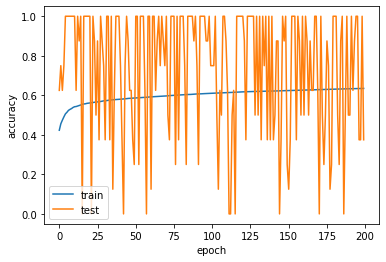

In [60]:
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.plot(train_accuracies, label="train")
plt.plot(val_accuracies, label="test")
plt.legend()

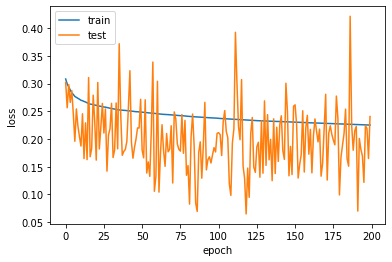

In [61]:
plt.ylabel("loss")
plt.xlabel("epoch")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="test")
plt.legend()

In [144]:
len(X_train)

631

In [63]:
from collections import Counter
def majority_vote(y_pred):
    #print(y_pred)
#     delete_list = []
#     c = 0
#     for p in prob:
#         if p.max() < 0.5:
#             delete_list.append(c)
#         c = c + 1
#     y_pred = np.delete(y_pred,delete_list)
#     if y_pred.size > 0:
    maj = Counter(y_pred).most_common(1)[0][0]
#     else: return []
    return maj 

# Test the saved models

In [64]:
import os
def make_model_list():
    model_list = []
    for file in os.listdir(model_path):
        if file.endswith(".txt"):
            model_list.append(file[:-4])
    return model_list

In [65]:
def get_test_list(model):
    with open(model_path + model + ".txt") as f:
        content = f.readlines()
    content = [x.strip() for x in content] 
    return content

In [66]:
temp_session_list = session_list
nb_classes = 4
batch_size = 4
predicted_labels = []
true_labels = []
model_list = make_model_list()

for m in model_list:
    test_list = get_test_list(m)
    test_data = pd.DataFrame()
    for ts in test_list:
        #print("|" + "*"*(count+1) + ' '*(len(train_list)-1-count)+ "| " +str(format((count+1)/len(train_list)*100,'.3f')) + "% is complete..." ,end="\r")
        tr = read_data(dates, ts)
        test_data = pd.concat([test_data,tr],axis=0,ignore_index=False)

    test_data.dropna(inplace=True, axis=0)
    test_feat = test_data#extract_mfcc_feat(test_data)
    
    test_feat.dropna(axis=0,inplace=True)
    
    
    X_test, y_test = make_data(test_feat)
    
    #def prep_data(X_train, y_train, X_test, y_test):
    label_encoder = preprocessing.LabelEncoder()
    training_targets = label_encoder.fit_transform(y_train)

    #Read testing data
    #testing_timestamps,testing_labels,testing_data = read_test_data(test_list)

    #Encode
    testing_targets = label_encoder.transform(y_test)

    #Make training dataloader
    #train_dataloader = make_train_dataloader(training_targets, X_train)

    #Make test dataloader
    test_dataloader = make_test_dataloader(testing_targets, X_test)

    #return train_dataloader, test_dataloader
    
    print("Making model for session group " + test_list[0].split("-")[0] + "-" + test_list[-1].split("-")[0])
    
    #model,val_accuracies,val_losses,train_accuracies,train_losses = train_nn_model()
    model = DACNN()
    device = torch.device('cuda:1')
    model = model.to(device)

    filename = m#test_list[0].split("-")[0] + "-" + test_list[-1].split("-")[0]
    PATH1 = model_path+ filename +'.pth'
    model.load_state_dict(torch.load(PATH1))
    
    test_lbl, test_cpred,val_acc, val_loss, test_confusion_matrix = test_nn_model(model)
    #print("Validation accuracy = ",val_acc)
    #print("Validation loss = ",val_loss)
    print(test_confusion_matrix)
    class_report = classification_report(test_lbl, test_cpred)
    print(class_report)
    
    predicted_labels.extend(test_cpred)
    true_labels.extend(test_lbl)
    
    print("Overall results...")   
    print(confusion_matrix(true_labels, predicted_labels))
    print(classification_report(true_labels, predicted_labels))

Making model for session group 20210310_15:26:59.160-20210319_16:13:09.655
tensor([[4., 0., 4., 0.],
        [0., 5., 0., 3.],
        [1., 0., 7., 0.],
        [0., 0., 0., 8.]])
              precision    recall  f1-score   support

         car       0.80      0.50      0.62         8
    signpost       1.00      0.62      0.77         8
        tree       0.64      0.88      0.74         8
        wall       0.73      1.00      0.84         8

    accuracy                           0.75        32
   macro avg       0.79      0.75      0.74        32
weighted avg       0.79      0.75      0.74        32

Overall results...
[[4 0 4 0]
 [0 5 0 3]
 [1 0 7 0]
 [0 0 0 8]]
              precision    recall  f1-score   support

         car       0.80      0.50      0.62         8
    signpost       1.00      0.62      0.77         8
        tree       0.64      0.88      0.74         8
        wall       0.73      1.00      0.84         8

    accuracy                           0.75      

tensor([[4., 0., 3., 1.],
        [0., 0., 0., 8.],
        [0., 0., 3., 5.],
        [0., 0., 0., 8.]])
              precision    recall  f1-score   support

         car       1.00      0.50      0.67         8
    signpost       0.00      0.00      0.00         8
        tree       0.50      0.38      0.43         8
        wall       0.36      1.00      0.53         8

    accuracy                           0.47        32
   macro avg       0.47      0.47      0.41        32
weighted avg       0.47      0.47      0.41        32

Overall results...
[[39  3 15 15]
 [ 1 44 12 15]
 [12  1 46 13]
 [ 6  8  5 53]]
              precision    recall  f1-score   support

         car       0.67      0.54      0.60        72
    signpost       0.79      0.61      0.69        72
        tree       0.59      0.64      0.61        72
        wall       0.55      0.74      0.63        72

    accuracy                           0.63       288
   macro avg       0.65      0.63      0.63       288


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


tensor([[7., 0., 1., 0.],
        [0., 8., 0., 0.],
        [0., 1., 7., 0.],
        [0., 8., 0., 0.]])
              precision    recall  f1-score   support

         car       1.00      0.88      0.93         8
    signpost       0.47      1.00      0.64         8
        tree       0.88      0.88      0.88         8
        wall       0.00      0.00      0.00         8

    accuracy                           0.69        32
   macro avg       0.59      0.69      0.61        32
weighted avg       0.59      0.69      0.61        32

Overall results...
[[46  3 16 15]
 [ 1 52 12 15]
 [12  2 53 13]
 [ 6 16  5 53]]
              precision    recall  f1-score   support

         car       0.71      0.57      0.63        80
    signpost       0.71      0.65      0.68        80
        tree       0.62      0.66      0.64        80
        wall       0.55      0.66      0.60        80

    accuracy                           0.64       320
   macro avg       0.65      0.64      0.64       320


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


tensor([[8., 0., 0., 0.],
        [0., 5., 0., 3.],
        [0., 0., 6., 2.],
        [0., 0., 0., 8.]])
              precision    recall  f1-score   support

         car       1.00      1.00      1.00         8
    signpost       1.00      0.62      0.77         8
        tree       1.00      0.75      0.86         8
        wall       0.62      1.00      0.76         8

    accuracy                           0.84        32
   macro avg       0.90      0.84      0.85        32
weighted avg       0.90      0.84      0.85        32

Overall results...
[[54  3 16 15]
 [ 1 57 12 18]
 [12  2 59 15]
 [ 6 16  5 61]]
              precision    recall  f1-score   support

         car       0.74      0.61      0.67        88
    signpost       0.73      0.65      0.69        88
        tree       0.64      0.67      0.66        88
        wall       0.56      0.69      0.62        88

    accuracy                           0.66       352
   macro avg       0.67      0.66      0.66       352


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


tensor([[5., 0., 3., 0.],
        [0., 1., 7., 0.],
        [0., 0., 8., 0.],
        [0., 0., 3., 5.]])
              precision    recall  f1-score   support

         car       1.00      0.62      0.77         8
    signpost       1.00      0.12      0.22         8
        tree       0.38      1.00      0.55         8
        wall       1.00      0.62      0.77         8

    accuracy                           0.59        32
   macro avg       0.85      0.59      0.58        32
weighted avg       0.85      0.59      0.58        32

Overall results...
[[59  3 19 15]
 [ 1 61 19 23]
 [12  2 67 15]
 [ 6 16  8 66]]
              precision    recall  f1-score   support

         car       0.76      0.61      0.68        96
    signpost       0.74      0.59      0.66       104
        tree       0.59      0.70      0.64        96
        wall       0.55      0.69      0.61        96

    accuracy                           0.65       392
   macro avg       0.66      0.65      0.65       392


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


tensor([[3., 3., 2., 0.],
        [0., 6., 0., 2.],
        [3., 0., 5., 0.],
        [3., 0., 0., 5.]])
              precision    recall  f1-score   support

         car       0.33      0.38      0.35         8
    signpost       0.67      0.75      0.71         8
        tree       0.71      0.62      0.67         8
        wall       0.71      0.62      0.67         8

    accuracy                           0.59        32
   macro avg       0.61      0.59      0.60        32
weighted avg       0.61      0.59      0.60        32

Overall results...
[[73  6 26 15]
 [ 1 83 20 32]
 [16  3 77 32]
 [11 20 12 85]]
              precision    recall  f1-score   support

         car       0.72      0.61      0.66       120
    signpost       0.74      0.61      0.67       136
        tree       0.57      0.60      0.59       128
        wall       0.52      0.66      0.58       128

    accuracy                           0.62       512
   macro avg       0.64      0.62      0.62       512


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


tensor([[6., 0., 1., 1.],
        [0., 5., 3., 0.],
        [0., 0., 2., 6.],
        [0., 7., 0., 1.]])
              precision    recall  f1-score   support

         car       1.00      0.75      0.86         8
    signpost       0.42      0.62      0.50         8
        tree       0.33      0.25      0.29         8
        wall       0.12      0.12      0.12         8

    accuracy                           0.44        32
   macro avg       0.47      0.44      0.44        32
weighted avg       0.47      0.44      0.44        32

Overall results...
[[ 91   6  31  23]
 [  1 100  23  41]
 [ 18   3 100  39]
 [ 12  27  14 107]]
              precision    recall  f1-score   support

         car       0.75      0.60      0.67       151
    signpost       0.74      0.61      0.66       165
        tree       0.60      0.62      0.61       160
        wall       0.51      0.67      0.58       160

    accuracy                           0.63       636
   macro avg       0.65      0.63     

In [120]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
tree,26.565042,27.877067,29.160591,29.922146,29.414932,28.456536,27.155752,28.218552,29.551389,28.657420,...,32.812588,49.548979,66.549976,83.566775,97.351812,104.862090,103.635693,92.211460,70.408011,40.942587
tree,24.858779,25.650046,26.494723,27.296816,27.103787,26.627991,26.113707,26.904797,28.208807,27.811381,...,41.077333,57.728539,75.777473,91.723414,104.530831,110.770017,108.275807,95.033571,72.723932,43.976719
tree,24.479948,25.152260,25.828762,26.430686,26.479890,25.690950,25.628889,26.957333,28.496878,27.848683,...,42.851206,59.636731,73.401656,87.968092,101.510328,113.437571,120.234882,119.194596,107.328880,84.722631
tree,23.630652,24.515125,25.747852,26.890994,27.231208,26.852609,26.647254,27.219844,28.089644,27.128751,...,43.849499,62.303363,80.957065,98.689295,114.661085,125.830351,129.502343,122.720595,104.643673,76.250312
tree,24.613127,25.362440,26.588936,27.748888,27.885174,27.001231,26.211379,27.175178,28.110261,27.863020,...,26.238810,45.523646,66.991444,89.261202,108.763183,121.474487,123.606996,113.132902,90.104495,57.732460
tree,26.217357,27.032163,27.875596,28.780300,28.322886,27.431954,26.139936,27.034513,28.462683,27.843682,...,26.247148,40.968663,61.770370,82.932252,104.579073,120.512800,128.280520,123.336534,105.677497,76.464599
tree,25.952134,26.774763,27.485832,27.959304,28.023807,27.029709,26.181381,27.334481,28.887557,28.600194,...,28.546275,42.803529,60.654843,77.894886,94.210216,104.722337,107.521988,99.430445,81.023020,54.038892
tree,24.684816,25.729166,26.773379,27.098647,27.548620,26.865185,26.423687,27.488097,28.686854,28.925519,...,37.242045,57.352373,76.017109,95.475497,110.718317,120.074494,119.588900,108.403220,85.925556,55.371641
car,27.039164,27.558897,27.861797,27.863333,27.356722,25.534693,24.717599,26.554471,27.849935,26.392971,...,8.059176,19.432884,44.692748,71.114882,99.441935,119.664015,129.575439,123.474638,103.228289,70.716286
car,26.604520,28.005289,29.229857,30.207236,30.140608,28.937045,27.555838,28.327777,29.885197,28.313275,...,29.255736,44.097239,61.009433,78.597051,95.113801,107.322614,112.186210,106.933462,91.302410,66.890687


In [121]:
test_cpred

array(['wall', 'wall', 'wall', 'wall', 'wall', 'wall', 'wall', 'wall',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'tree', 'wall',
       'signpost', 'signpost', 'wall', 'signpost', 'wall', 'signpost',
       'wall', 'wall', 'signpost', 'signpost', 'signpost', 'signpost',
       'signpost', 'wall', 'wall'], dtype=object)

In [117]:
temp_session_list = session_list
nb_classes = 4
batch_size = 4
predicted_labels = []
true_labels = []
while len(temp_session_list)>0:
    #print(len(session_list))
    sess_labels = label_sessions(temp_session_list)

    df_session_list = pd.DataFrame(temp_session_list)
    df_session_list.index = sess_labels

    test_list = []
    for sl in set(sess_labels):
        try:
            test_list.extend(df_session_list.loc[df_session_list.index == sl].sort_values(by=[0]).iloc[0].values.tolist())
        except: continue
    #print(test_list)
    #for sl in set(sess_labels):
    test_data = pd.DataFrame()
    train_data = pd.DataFrame()
    #test_list.extend(df_session_list.loc[df_session_list.index == sl].sample(1).values.tolist()[0])
    count = 0
    
    temp_session_list = list(set(temp_session_list) - set(test_list))
    for ts in test_list:
        #print("|" + "*"*(count+1) + ' '*(len(train_list)-1-count)+ "| " +str(format((count+1)/len(train_list)*100,'.3f')) + "% is complete..." ,end="\r")
        tr = read_data(dates, ts)
        test_data = pd.concat([test_data,tr],axis=0,ignore_index=False)
        count = count+1

        test_data.dropna(inplace=True, axis=0)

    test_feat = test_data#extract_mfcc_feat(test_data)
    
    test_feat.dropna(axis=0,inplace=True)
    
    
    X_test, y_test = make_data(test_feat)
    
    #def prep_data(X_train, y_train, X_test, y_test):
    label_encoder = preprocessing.LabelEncoder()
    training_targets = label_encoder.fit_transform(y_train)

    #Read testing data
    #testing_timestamps,testing_labels,testing_data = read_test_data(test_list)

    #Encode
    testing_targets = label_encoder.transform(y_test)

    #Make training dataloader
    #train_dataloader = make_train_dataloader(training_targets, X_train)

    #Make test dataloader
    test_dataloader = make_test_dataloader(testing_targets, X_test)

    #return train_dataloader, test_dataloader
    
    print("Making model for session group " + test_list[0].split("-")[0] + "-" + test_list[-1].split("-")[0])
    
    #model,val_accuracies,val_losses,train_accuracies,train_losses = train_nn_model()
    filename = test_list[0].split("-")[0] + "-" + test_list[-1].split("-")[0]
    PATH1 = './models/v8/'+ filename +'.pth'
    model.load_state_dict(torch.load(PATH1))
    
    test_lbl, test_cpred,val_acc, val_loss, test_confusion_matrix = test_nn_model(model)
    #print("Validation accuracy = ",val_acc)
    #print("Validation loss = ",val_loss)
    print(test_confusion_matrix)
    class_report = classification_report(test_lbl, test_cpred)
    print(class_report)
    
    predicted_labels.extend(test_cpred)
    true_labels.extend(test_lbl)
    
    print("Overall results...")   
    print(confusion_matrix(true_labels, predicted_labels))
    print(classification_report(true_labels, predicted_labels))
    #break
    
#     plt.ylabel("accuracy")
#     plt.xlabel("epoch")
#     plt.plot(train_accuracies, label="train")
#     plt.plot(val_accuracies, label="test")
#     plt.legend()
#     plt.savefig('./visual/'+ "accuracy_"+ filename + ".png")
#     plt.close()
    
#     plt.ylabel("loss")
#     plt.xlabel("epoch")
#     plt.plot(train_losses, label="train")
#     plt.plot(val_losses, label="test")
#     plt.legend()
#     plt.savefig('./visual/'+ "loss_"+ filename + ".png")
#     plt.close()

Making model for session group 20210319_16:08:41.692-20210310_15:25:26.159


FileNotFoundError: [Errno 2] No such file or directory: './models/v8/20210319_16:08:41.692-20210310_15:25:26.159.pth'

In [93]:
model_list

['20210310_15:26:59.160-20210319_16:13:09.655',
 '20210310_15:25:26.159-20210319_16:08:41.692',
 '20210310_15:32:48.233-20210319_16:21:59.598',
 '20210310_15:30:50.167-20210319_16:17:22.477',
 '20210310_15:29:41.711-20210319_16:15:55.217',
 '20210310_15:31:57.174-20210319_16:18:28.688',
 '20210310_15:29:00.353-20210319_16:14:50.583',
 '20210310_15:31:09.318-20210319_16:17:45.271',
 '20210310_15:32:32.730-20210319_16:21:29.421',
 '20210310_15:25:48.350-20210319_16:10:10.704',
 '20210310_15:33:58.721-20210319_16:23:03.444',
 '20210319_16:26:51.249-20210319_16:26:51.249',
 '20210310_15:29:25.107-20210319_16:15:18.712',
 '20210310_15:26:14.684-20210319_16:10:32.051',
 '20210310_15:30:21.964-20210319_16:16:47.785',
 '20210310_15:34:48.696-20210319_16:26:08.675',
 '20210310_15:34:21.045-20210319_16:23:44.170',
 '20210310_15:30:04.369-20210319_16:16:17.283',
 '20210310_15:32:14.252-20210319_16:19:24.958',
 '20210310_15:27:20.548-20210319_16:14:28.970',
 '20210310_15:26:36.351-20210319_16:11:1

In [96]:

    #for m in model_list:
    f = open("models/v8/" + model + ".txt", "r")
    print(f.read())

20210310_15:26:59.160-20210310_15:27:08.845
20210310_15:44:04.924-20210310_15:44:15.189
20210315_17:07:38.925-20210315_17:07:48.142
20210319_16:13:09.655-20210319_16:13:20.391

20210310_15:25:26.159-20210310_15:25:39.816
20210310_15:42:00.571-20210310_15:42:11.946
20210315_17:05:24.467-20210315_17:05:35.463
20210319_16:08:41.692-20210319_16:08:51.649

20210310_15:32:48.233-20210310_15:32:58.401
20210310_15:52:48.777-20210310_15:52:58.321
20210315_17:20:38.369-20210315_17:20:48.298
20210319_16:21:59.598-20210319_16:22:09.200

20210310_15:30:50.167-20210310_15:31:01.015
20210310_15:51:04.495-20210310_15:51:14.504
20210315_17:11:54.379-20210315_17:12:04.246
20210319_16:17:22.477-20210319_16:17:32.588

20210310_15:29:41.711-20210310_15:29:51.347
20210310_15:49:41.258-20210310_15:49:51.348
20210315_17:09:47.785-20210315_17:09:56.866
20210319_16:15:55.217-20210319_16:16:06.432

20210310_15:31:57.174-20210310_15:32:07.006
20210310_15:51:45.847-20210310_15:51:55.083
20210315_17:13:29.822-20210

In [104]:
content

['20210310_15:26:36.351-20210310_15:26:45.720',
 '20210310_15:43:03.762-20210310_15:43:16.249',
 '20210315_17:07:11.513-20210315_17:07:20.684',
 '20210319_16:11:12.300-20210319_16:11:24.827']

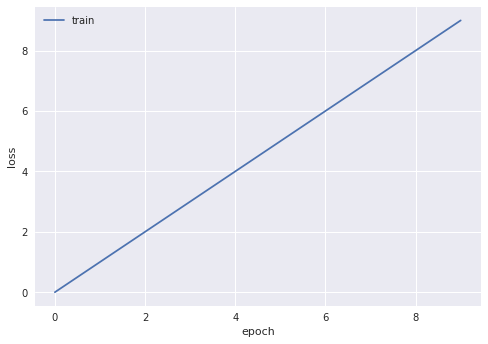

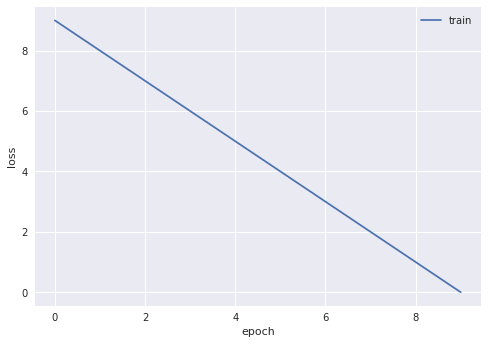

In [188]:
for x in range(10):
    p = [0,1,2,3,4,5,6,7,8,9]
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.plot(p, label="train")
    plt.legend()
    plt.show()
    plt.close()
    
    p = [0,1,2,3,4,5,6,7,8,9]
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.plot(p[::-1], label="train")
    plt.legend()
    plt.show()
    plt.close()
    #plt.savefig('./visual/'+ "loss_"+ filename + ".png")
    break

In [173]:
X_test = X_test.iloc[:28]

In [177]:
y_test = y_test[:28]

In [180]:
testing_targets = label_encoder.transform(y_test)
test_dataloader = make_test_dataloader(testing_targets, X_test)

In [181]:
val_acc, val_loss, test_confusion_matrix = test_nn_model(model)

In [153]:
filename = test_list[0].split("-")[0] + "-" + test_list[-1].split("-")[0]
PATH = './models/'+ filename +'.pth'
torch.save(model.state_dict(), PATH)

In [152]:
filename = test_list[0].split("-")[0] + "-" + test_list[-1].split("-")[0]

'20210319_16:10:10.704-20210310_15:42:19.717'

In [ ]:
test_feat = test_data#extract_mfcc_feat(test_data)
train_feat = train_data#extract_mfcc_feat(train_data)
test_feat.dropna(axis=0,inplace=True)
train_feat.dropna(axis=0,inplace=True)
X_train, y_train = make_data(train_feat)
X_test, y_test = make_data(test_feat)

In [527]:
sess_labels = label_sessions(session_list)

In [528]:
df_session_list = pd.DataFrame(session_list)
df_session_list.index = sess_labels

In [529]:
df_session_list

,0
tree,20210310_15:25:26.159-20210310_15:25:39.816
tree,20210310_15:25:48.350-20210310_15:25:58.158
tree,20210310_15:26:14.684-20210310_15:26:25.036
tree,20210310_15:26:36.351-20210310_15:26:45.720
tree,20210310_15:26:59.160-20210310_15:27:08.845
...,...
signpost,20210319_16:21:59.598-20210319_16:22:09.200
signpost,20210319_16:23:03.444-20210319_16:23:13.463
signpost,20210319_16:23:44.170-20210319_16:23:54.026
signpost,20210319_16:26:08.675-20210319_16:26:18.199


In [537]:
test_list = []
for sl in set(sess_labels):
    try:
        test_list.extend(df_session_list.loc[df_session_list.index == sl].sort_values(by=[0]).iloc[0].values.tolist())
    except: continue

In [538]:
test_list.sort()

In [539]:
test_list

['20210310_15:25:26.159-20210310_15:25:39.816',
 '20210310_15:42:00.571-20210310_15:42:11.946',
 '20210315_17:05:24.467-20210315_17:05:35.463',
 '20210319_16:08:41.692-20210319_16:08:51.649']

In [480]:
df_session_list.loc[df_session_list.index == sl].iloc[0]

0    20210319_16:08:41.692-20210319_16:08:51.649
Name: signpost, dtype: object

In [61]:
test_list

NameError: name 'test_list' is not defined

NameError: name 'train_accuracies' is not defined

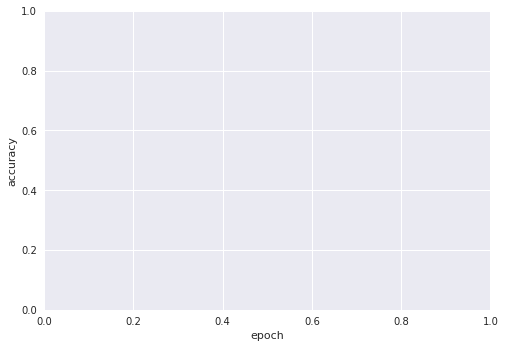

In [154]:
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.plot(train_accuracies, label="train")
plt.plot(val_accuracies, label="test")
plt.legend()

NameError: name 'train_losses' is not defined

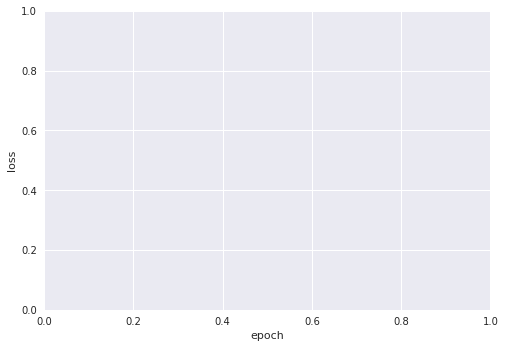

In [159]:
plt.ylabel("loss")
plt.xlabel("epoch")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="test")
plt.legend()

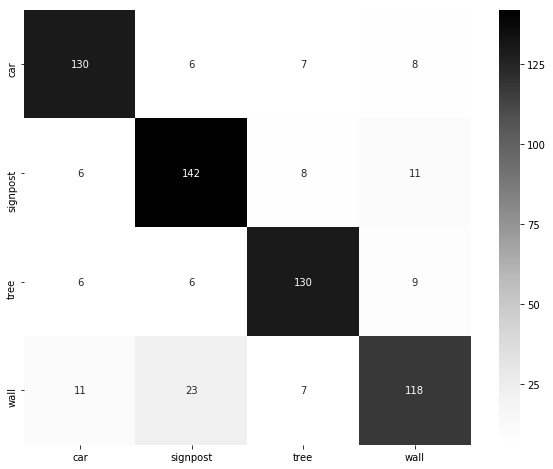

In [401]:
plot_cm(confusion_matrix,label_encoder.classes_)

In [27]:
def diff_calc(df_slize):
    df_diff = df_slize.diff(axis=1)
    df_diff.dropna(inplace=True,axis=1)
    #norm_diff = df_diff / df_diff.max(axis=1).values
    norm_diff = df_diff.divide(df_diff.max(axis=1).values, axis=0)
    return norm_diff

In [28]:
diff_calc(test_data)

NameError: name 'test_data' is not defined

In [511]:
from sklearn.metrics import confusion_matrix, classification_report
#dates = ["20210315"]
predicted_labels = []
true_labels = []
pred_prob = []
maj_pre_lab =[]
maj_true_lab = []
w_maj_pre_lab = []
w_maj_true_lab = []

for session in session_list:

    #test_data = pd.concat(pd.read_csv("processed/" + "spectrum/" + date + "/right/" + session, index_col=False, header=None))

    
    #display(test_data.head)
    print("Test session = ", session)
    test_data = read_data(dates,session)
    test_data.dropna(inplace=True, axis=0)
    #test_data = one_class_svm(test_data)
    #test_data = pd.concat(diff_calc(test_data.iloc[:,0:94]))
    train_list = [x for x in session_list if x != session]
    train_data = pd.DataFrame()
    count = 0
    for ts in train_list:
        print("|" + "*"*(count+1) + ' '*(len(train_list)-1-count)+ "| " +str(format((count+1)/len(train_list)*100,'.3f')) + "% is complete..." ,end="\r")
        #tr = pd.read_csv("processed/" + "spectrum/" + date + "/right/" + ts, index_col=False, header=None)
#         tr_feature1 = pd.read_csv("processed/" + "spectrum/" + date + "/right/" + ts, index_col=False, header=None)
#         tr_feature2 = pd.read_csv("processed/" + "spectrum/" + date + "/left/" + ts, index_col=False, header=None)
#         tr_feature3 =pd.read_csv("processed/" + "mfcc/" + date + "/right/" + ts, index_col=False, header=None)
#         tr_feature4 = pd.read_csv("processed/" + "mfcc/" + date + "/left/" + ts, index_col=False, header=None)
#         tr = pd.concat([tr_feature1,tr_feature2,tr_feature3,tr_feature4],axis=1)
#         tr = label_data(ts,tr)
        tr = read_data(dates, ts)
        train_data = pd.concat([train_data,tr],axis=0,ignore_index=False)
        count = count+1
        #break
    #print(np.unique(train_data.index, return_counts=True))
    #train_data = random_undersampling(train_data)
    #print(np.unique(train_data.index, return_counts=True))
    train_data.dropna(inplace=True, axis=0)
    #train_data = diff_calc(train_data.iloc[:,0:94])
    #train_data = one_class_svm(train_data)
    #train_data, test_data = pca_calc(train_data,test_data)
    test_feat = test_data#extract_mfcc_feat(test_data)
    train_feat = train_data#extract_mfcc_feat(train_data)
    test_feat.dropna(axis=0,inplace=True)
    train_feat.dropna(axis=0,inplace=True)
    X_train, y_train = make_data(train_feat)
    X_test, y_test = make_data(test_feat)
    model = randomForest(X_train, y_train.tolist())
    y_pred = model.predict(X_test)
    prob = model.predict_proba(X_test)
    
    maj_pre_lab.append(majority_vote(y_pred))
    maj_true_lab.append(majority_vote(y_test))
    
    w_maj_pre_lab.append(weighted_majority_vote(y_pred, prob))
    w_maj_true_lab.append(weighted_majority_vote(y_test, prob))
    
    if y_test.all() == "car":
        pred_prob.append(["car",prob[:,0].tolist()])
    elif y_test.all() == "signpost":
        pred_prob.append(["signpost",prob[:,1].tolist()])
    elif y_test.all() == "tree":
        pred_prob.append(["tree",prob[:,2].tolist()])
    elif y_test.all() == "wall":
        pred_prob.append(["wall",prob[:,3].tolist()])
    conf_mat = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print("\n")
    print(conf_mat)
    print(class_report)
    predicted_labels.extend(y_pred)
    true_labels.extend(y_test)
    break
print("Overall results...")   
print(confusion_matrix(true_labels, predicted_labels))
print(classification_report(true_labels, predicted_labels))

print("Majority vote results...")
print(confusion_matrix(maj_true_lab, maj_pre_lab))
print(classification_report(maj_true_lab, maj_pre_lab))

print("Weighted majority vote results...")
print(confusion_matrix(w_maj_true_lab, w_maj_pre_lab))
print(classification_report(w_maj_true_lab, w_maj_pre_lab))

Test session =  20210310_15:25:26.159-20210310_15:25:39.816
|*******************************************************************************| 100.000% is complete...

[[0 0]
 [8 0]]
              precision    recall  f1-score   support

    signpost       0.00      0.00      0.00       0.0
        tree       0.00      0.00      0.00       8.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0

Overall results...
[[0 0]
 [8 0]]
              precision    recall  f1-score   support

    signpost       0.00      0.00      0.00       0.0
        tree       0.00      0.00      0.00       8.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0

Majority vote results...
[[0 0]
 [1 0]]
              precision    recall  f1-score   support

    signpost       0.00      0.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
